# Обзор метрик, оценка монетизации и юнит-экономики, поиск инсайтов и точек роста, A/B-тестирование
- Обзор ключевых метрик
    - На этом этапе вам нужно выполнить верхнеуровневую оценку состояния продукта с помощью собранных витрин. Бизнес просит просто оценить текущее состояние — без глубокой сегментации и оценки сложных метрик. 
    - Выручка бизнеса — 5% комиссии от стоимости любой продажи.
- Оценка метрик монетизации и юнит-экономики
    - Важны как агрегированные метрики (ARPU, AOV), так и показатели эффективности (CAC, ROI, Payback Period).
- Поиск инсайтов, точек роста и сегментация
    - Исследование вглубь данных: по каналам, сегментам пользователей, категориям товаров, регионам, типам устройств.
- По итогам анализа:
    - сформулировать выводы в виде аналитической записки,
    - сформулируйте несколько гипотез, которые помогут развить продукт.   

# Описание данных

## Таблица `Users`

| Поле              | Описание                                                                                       |
|-------------------|------------------------------------------------------------------------------------------------|
| `user_id`         | Уникальный идентификатор пользователя.                                                         |
| `registration_date` | Дата регистрации пользователя.                                                                |
| `user_params`     | JSON-объект (словарь) с параметрами пользователя:                                              |
|                   | &nbsp;&nbsp;&nbsp;• `age` — возраст                                                            |
|                   | &nbsp;&nbsp;&nbsp;• `gender` — пол (`M`, `F`)                                                  |
|                   | &nbsp;&nbsp;&nbsp;• `country` — страна                                                         |
|                   | &nbsp;&nbsp;&nbsp;• `region` — регион                                                          |
|                   | &nbsp;&nbsp;&nbsp;• `buyer_segment` — сегмент покупателя                                       |
|                   | &nbsp;&nbsp;&nbsp;• `user_segment` — пользовательский сегмент (новичок, активный, VIP, спящий) |
|                   | &nbsp;&nbsp;&nbsp;• `device` — тип устройства (`desktop`, `mobile`, `tablet`)                  |
|                   | &nbsp;&nbsp;&nbsp;• `browser` — браузер (Chrome, Firefox, Safari, Edge)                        |
|                   | &nbsp;&nbsp;&nbsp;• `os` — операционная система (Windows, macOS, iOS, Android)                 |
|                   | &nbsp;&nbsp;&nbsp;• `acq_channel` — канал привлечения                                          |
|                   | &nbsp;&nbsp;&nbsp;• `campaign_id` — идентификатор рекламной кампании (если применимо)          |

---

## Таблица `Orders`

| Поле         | Описание                                                                 |
|--------------|--------------------------------------------------------------------------|
| `order_id`   | Уникальный идентификатор заказа.                                         |
| `user_id`    | Идентификатор пользователя, который сделал заказ (внешний ключ на Users).|
| `order_date` | Дата и время оформления заказа.                                          |
| `product_id` | Уникальный идентификатор товара, который был куплен.                     |
| `quantity`   | Количество единиц товара в заказе.                                       |
| `unit_price` | Цена за одну единицу товара на момент заказа.                            |
| `total_price`| Общая стоимость позиции в заказе (`quantity × unit_price`).              |

---

## Таблица `Product_dict`

| Поле          | Описание                                                  |
|---------------|-----------------------------------------------------------|
| `product_id`  | Уникальный идентификатор товара.                          |
| `category_id` | Идентификатор категории товара.                           |
| `category_name` | Название категории товара (например, "Аксессуары для гаджетов"). |
| `product_name`  | Наименование товара (например, "AirPods Pro").          |

---

## Таблица `Events`

| Поле         | Описание                                                                                      |
|--------------|-----------------------------------------------------------------------------------------------|
| `event_id`   | Уникальный идентификатор события.                                                             |
| `session_id` | Идентификатор сессии пользователя, во время которой произошло событие.                        |
| `user_id`    | Уникальный идентификатор пользователя.                                                        |
| `timestamp`  | Время и дата события.                                                                         |
| `event_type` | Тип события (например, вход пользователя, просмотр страницы, просмотр товара, добавление в корзину). |
| `product_id` | Идентификатор продукта, к которому относится событие (если применимо).                        |
| `event_params` | JSON-поле с дополнительными параметрами события:                                            |
|              | &nbsp;&nbsp;&nbsp;• `device` — тип устройства (desktop, mobile, tablet)                      |
|              | &nbsp;&nbsp;&nbsp;• `browser` — браузер пользователя (Chrome, Firefox, Safari, Edge и др.)    |
|              | &nbsp;&nbsp;&nbsp;• `os` — операционная система (macOS, Windows, iOS, Android и др.)          |
|              | &nbsp;&nbsp;&nbsp;• `event_index` — порядковый номер события в сессии                         |
|              | &nbsp;&nbsp;&nbsp;• `timestamp` — время события в формате ISO                                 |
|              | &nbsp;&nbsp;&nbsp;• `user_segment` — сегмент пользователя (новичок, активный, VIP и т. п.)    |

---

## Таблица `Sessions`

| Поле           | Описание                                                                                      |
|----------------|-----------------------------------------------------------------------------------------------|
| `session_id`   | Уникальный идентификатор сессии пользователя.                                                 |
| `user_id`      | Уникальный идентификатор пользователя.                                                        |
| `session_start`| Дата и время начала сессии.                                                                   |
| `session_params` | JSON-поле с параметрами сессии:                                                             |
|                | &nbsp;&nbsp;&nbsp;• `device` — тип устройства (например, desktop)                             |
|                | &nbsp;&nbsp;&nbsp;• `browser` — браузер пользователя (например, Firefox)                      |
|                | &nbsp;&nbsp;&nbsp;• `os` — операционная система (например, macOS)                             |
|                | &nbsp;&nbsp;&nbsp;• `user_segment` — сегмент пользователя (например, regular)                 |
|                | &nbsp;&nbsp;&nbsp;• `entry_path` — страница входа в сессию (например, /product, /promo)       |
|                | &nbsp;&nbsp;&nbsp;• `path_start` — первая страница или путь кампании (например, /campaign/5)  |
|                | &nbsp;&nbsp;&nbsp;• `country` — страна пользователя (например, Россия)                        |
|                | &nbsp;&nbsp;&nbsp;• `region` — регион или город (например, Москва)                            |
|                | &nbsp;&nbsp;&nbsp;• `screen_size` — разрешение экрана (например, 1920×1080)                   |
|                | &nbsp;&nbsp;&nbsp;• `scroll_depth` — глубина прокрутки страницы в процентах (например, 96)    |
|                | &nbsp;&nbsp;&nbsp;• `utm_source` — источник трафика из UTM-меток (например, direct)           |
|                | &nbsp;&nbsp;&nbsp;• `utm_campaign_id` — идентификатор кампании из UTM (например, 39)          |


## Описание событий

| Событие             | Описание                                                                                  |
|---------------------|-------------------------------------------------------------------------------------------|
| `page_view`         | Открытие любой страницы сайта или приложения пользователем.                                |
| `product_view`      | Просмотр страницы конкретного товара.                                                     |
| `product_click`     | Клик по товару (например, из списка товаров или на баннере).                              |
| `add_to_cart`       | Добавление товара в корзину.                                                              |
| `remove_from_cart`  | Удаление товара из корзины.                                                               |
| `search`            | Выполнение поиска по сайту или приложению.                                                |
| `filter_apply`      | Применение фильтра (например, по цене, бренду, категории).                                |
| `checkout_start`    | Начало оформления заказа (переход к оформлению корзины).                                  |
| `checkout_complete` | Завершение оформления заказа (не гарантирует покупку, покупка зависит от факта оплаты).                                          |
| `user_login`        | Вход пользователя в личный кабинет или аккаунт.                                           |
| `user_logout`       | Выход пользователя из аккаунта.                                                           |
| `wishlist_add`      | Добавление товара в список желаемого (wishlist).                                          |
| `category_view`     | Просмотр страницы категории товаров.                                                      |
| `banner_click`      | Клик по рекламному баннеру на сайте или в приложении.                                     |
| `promo_view`        | Просмотр промо-акции или специального предложения.                                        |


 Выручка маркетплейса = 5% от total_price

# Блок кода и расчета метрик

In [1]:
# Загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

In [2]:
pa_diploma_orders = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_orders.csv')
pa_diploma_campaign_costs = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_campaign_costs.csv')
pa_diploma_sessions = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_sessions.csv')
pa_diploma_users = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_users.csv')
pa_diploma_events = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_events.csv')

In [3]:
dataframes = [
    ('pa_diploma_orders', pa_diploma_orders),
    ('pa_diploma_campaign_costs', pa_diploma_campaign_costs),
    ('pa_diploma_sessions', pa_diploma_sessions),
    ('pa_diploma_users', pa_diploma_users),
    ('pa_diploma_events', pa_diploma_events)]

for name, df in dataframes:
    print(f"Информация о {name}:")
    print(df.info())
    print('\nОсновная статистика:')
    print(df.describe())
    print('\nПропущенные значения:')
    print(df.isnull().sum())
    print('\nКоличество дубликатов:')
    print(df.duplicated().sum())
    print('----------------------------------------------------')
    print('----------------------------------------------------')
    print('----------------------------------------------------')

Информация о pa_diploma_orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31357 entries, 0 to 31356
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       31357 non-null  int64  
 1   user_id        31357 non-null  int64  
 2   order_date     31357 non-null  object 
 3   product_name   31357 non-null  object 
 4   quantity       31357 non-null  int64  
 5   unit_price     31357 non-null  float64
 6   total_price    31357 non-null  float64
 7   category_name  31357 non-null  object 
 8   order_week     31357 non-null  object 
 9   order_month    31357 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 2.4+ MB
None

Основная статистика:
           order_id       user_id      quantity    unit_price    total_price
count  31357.000000  31357.000000  31357.000000  31357.000000   31357.000000
mean   15698.061772  15888.030743      2.006857   6986.909334   14030.175560
std     908

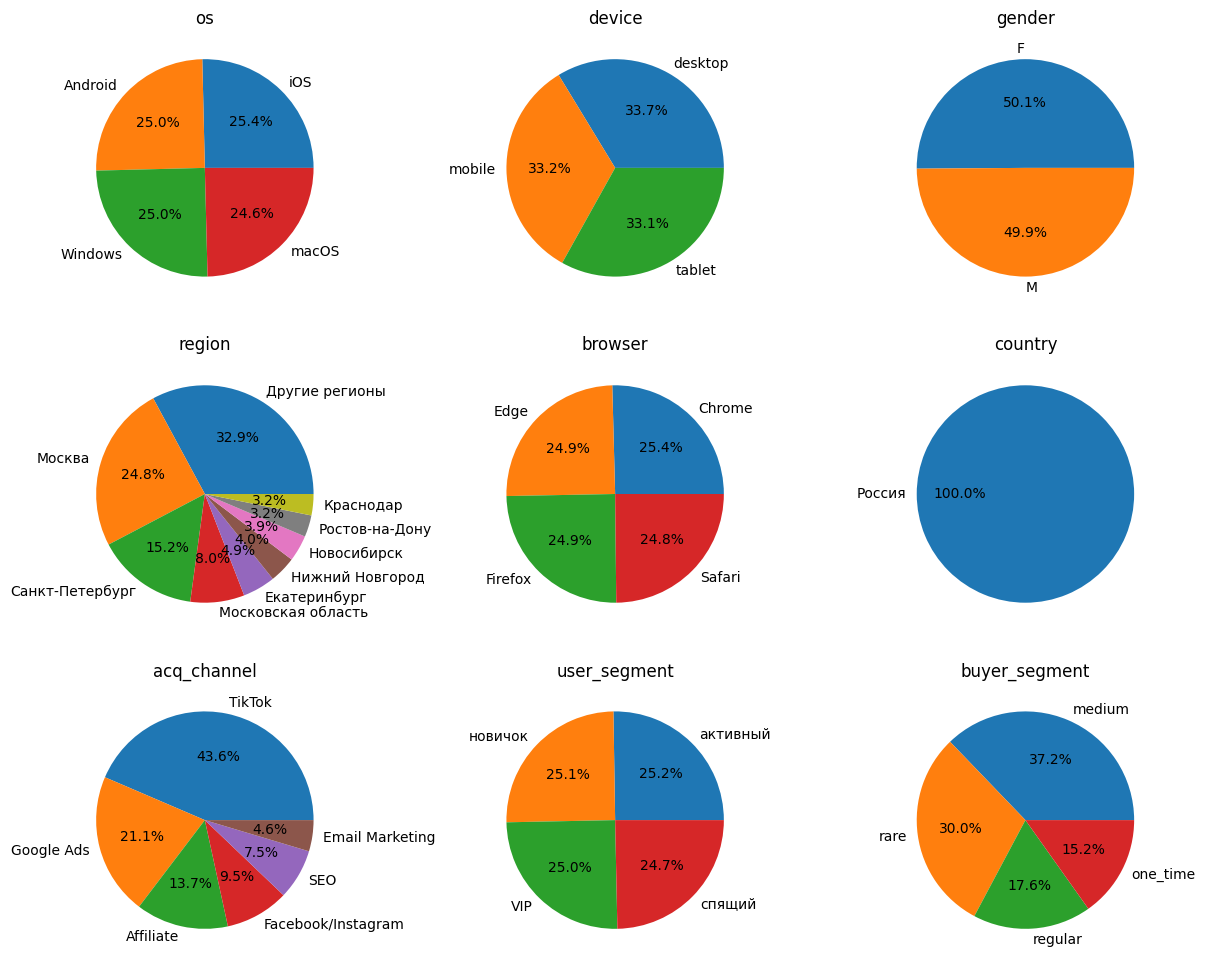

In [4]:
# Список сегментов
segments = ['os', 'device', 'gender', 'region', 'browser', 
            'country', 'acq_channel', 'user_segment', 'buyer_segment']

# Настройка сетки
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten() 

# Отрисовка круговых диаграмм
for i, segment in enumerate(segments):
    data = pa_diploma_users[segment].value_counts()
    axes[i].pie(
        data, 
        labels=data.index, 
        autopct='%1.1f%%')
    axes[i].set_title(segment)

plt.show()

In [5]:
# Изменение типа данных на datetime 
pa_diploma_orders['order_date_day'] = pd.to_datetime(pa_diploma_orders['order_date']).dt.to_period('D').dt.to_timestamp()
pa_diploma_sessions['session_start_day'] = pd.to_datetime(pa_diploma_sessions['session_start']).dt.to_period('D').dt.to_timestamp()
pa_diploma_users['registration_date_day'] = pd.to_datetime(pa_diploma_users['registration_date']).dt.to_period('D').dt.to_timestamp()
pa_diploma_events['event_date_day'] = pd.to_datetime(pa_diploma_events['event_date']).dt.to_period('D').dt.to_timestamp()

- Данные также имеют корректный вид и структуру
- Все даты находятся в нужном диапазоне (2024 год)
- Временные переменные приведены к соответствующему типу данных
- Пропуски в `pa_diploma_events` имеют естественную природу, так как не все логированные события будут иметь характеристики совершения покупки
- Дубликаты отсутствуют

### Обзор ключевых метрик

In [6]:
# Добавляем данные по ревеню платформы от каждого заказа
pa_diploma_orders['revenue'] = pa_diploma_orders['total_price'] * 0.05

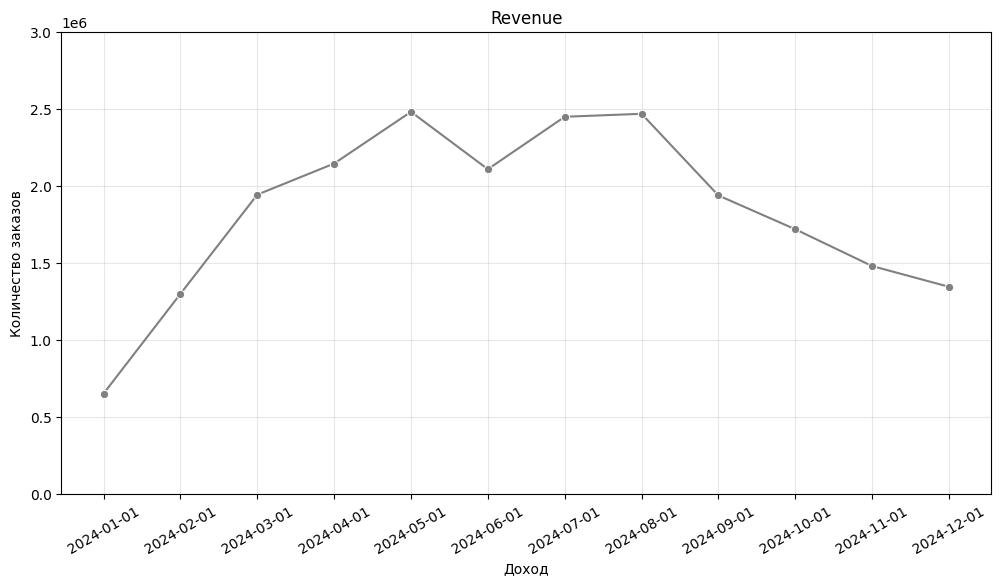

In [7]:
# Считаем доход от заказов за каждый день с месячной скользящей средней
total_revenue_month = pa_diploma_orders.groupby('order_month')['revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=total_revenue_month, x='order_month', y='revenue', color='gray', marker='o')
plt.title('Revenue')
plt.xlabel('Доход')
plt.ylabel('Количество заказов')
plt.xticks(rotation=30)
plt.grid(alpha=0.3)
plt.ylim(0, 3000000)
plt.show()

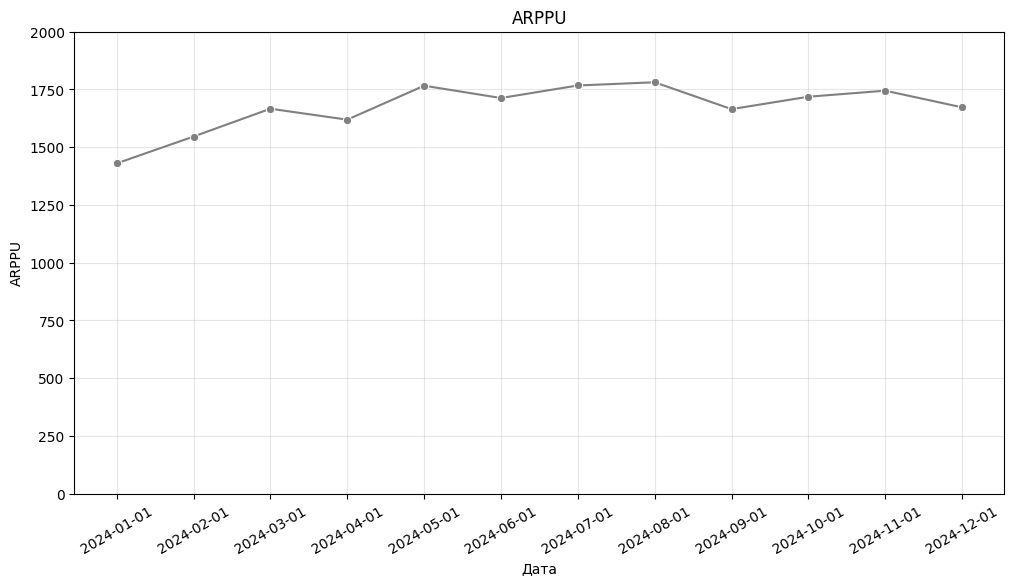

In [8]:
# ARPPU
total_pay_users_per_day = pa_diploma_orders.groupby('order_month')['user_id'].nunique().reset_index()
total_pay_users_per_day = total_pay_users_per_day.rename(columns={'user_id': 'pay_users'})
total_revenue_month['ARPPU'] = total_revenue_month['revenue'] / total_pay_users_per_day['pay_users']

plt.figure(figsize=(12, 6))
sns.lineplot(data=total_revenue_month, x='order_month', y='ARPPU',  color='gray', marker='o')
plt.title('ARPPU')
plt.xlabel('Дата')
plt.ylabel('ARPPU')
plt.xticks(rotation=30)
plt.grid(alpha=0.3)
plt.ylim(0, 2000)
plt.show()

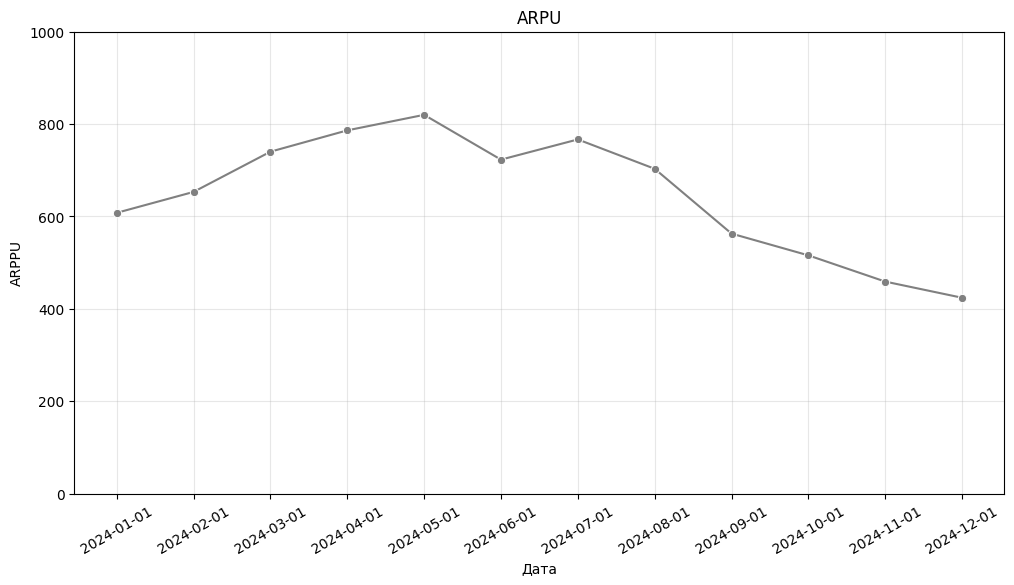

In [9]:
# ARPU
total_users_per_month = pa_diploma_sessions.groupby('session_month')['user_id'].nunique().reset_index()
total_users_per_month = total_users_per_month.rename(columns={'user_id': 'total_users'})

total_revenue_month['ARPU'] = total_revenue_month['revenue'] / total_users_per_month['total_users']

plt.figure(figsize=(12, 6))
sns.lineplot(data=total_revenue_month, x='order_month', y='ARPU',  color='gray', marker='o')
plt.title('ARPU')
plt.xlabel('Дата')
plt.ylabel('ARPPU')
plt.xticks(rotation=30)
plt.grid(alpha=0.3)
plt.ylim(0, 1000)
plt.show()

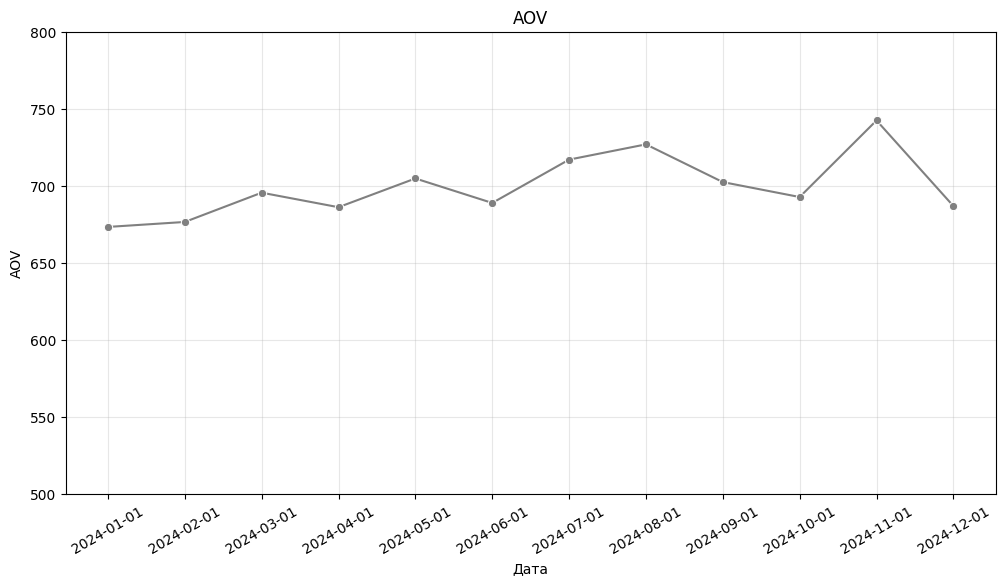

In [10]:
aov_df = pa_diploma_orders.groupby('order_month')['order_id'].nunique().reset_index()
aov_df = aov_df.merge(total_revenue_month, how='left')
aov_df['aov'] = aov_df['revenue'] / aov_df['order_id']

plt.figure(figsize=(12, 6))
sns.lineplot(data=aov_df, x='order_month', y='aov',  color='gray', marker='o')
plt.title('AOV')
plt.xlabel('Дата')
plt.ylabel('AOV')
plt.xticks(rotation=30)
plt.grid(alpha=0.3)
plt.ylim(500, 800)
plt.show()

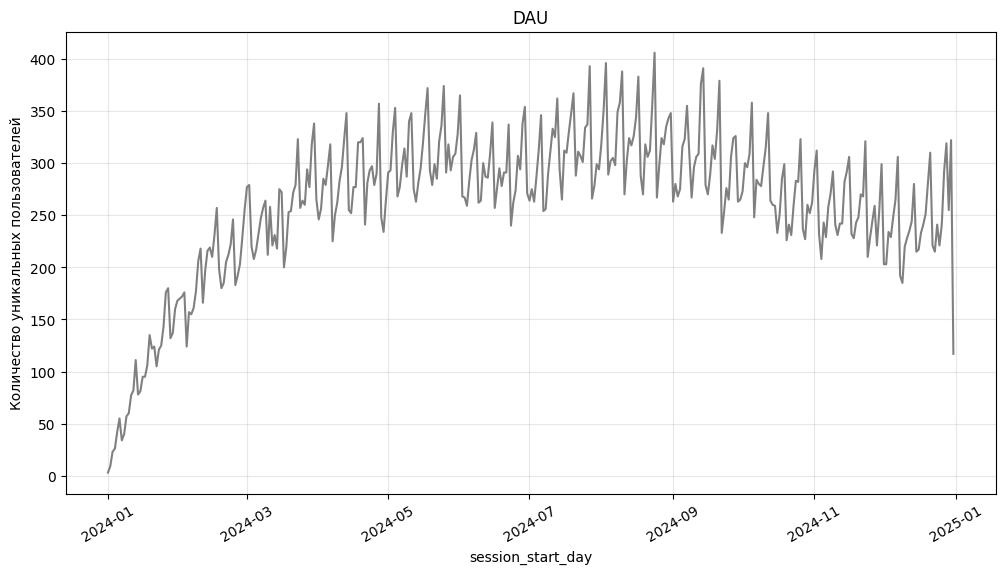

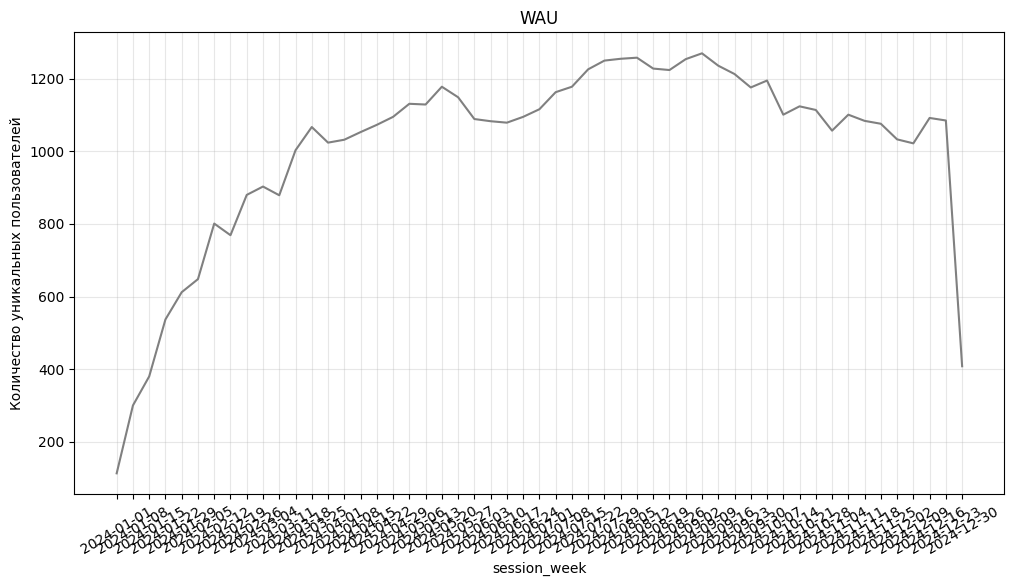

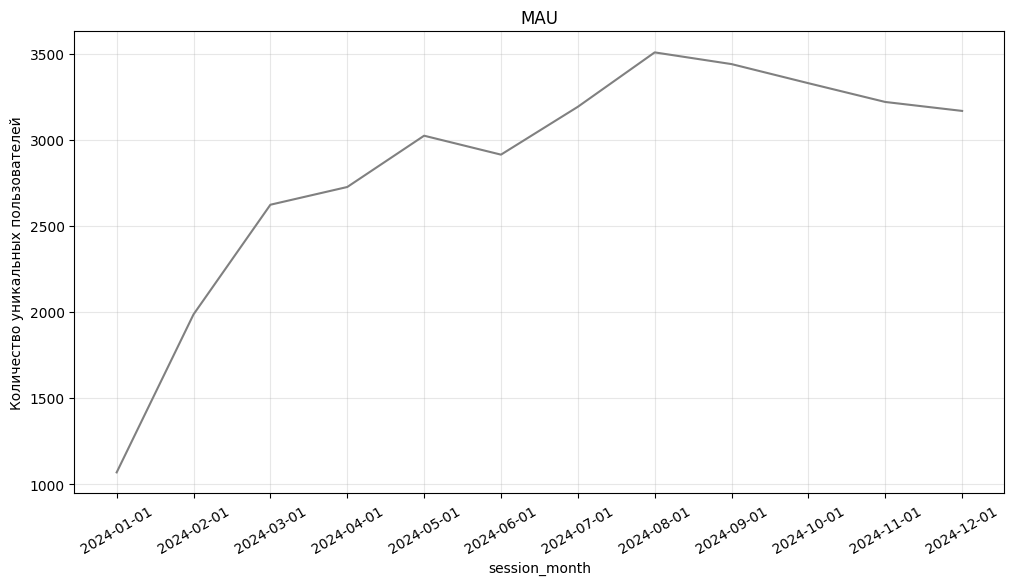

In [11]:
for name, cycle in [('DAU', 'session_start_day'), 
                    ('WAU','session_week'), 
                    ('MAU','session_month')]:
    plot_df = pa_diploma_sessions.groupby(cycle)['user_id'].nunique().reset_index()
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=plot_df, x=cycle, y='user_id', color='gray')
    plt.title(name)
    plt.xlabel(cycle)
    plt.ylabel('Количество уникальных пользователей')
    plt.xticks(rotation=30)
    plt.grid(alpha=0.3)
    plt.show()

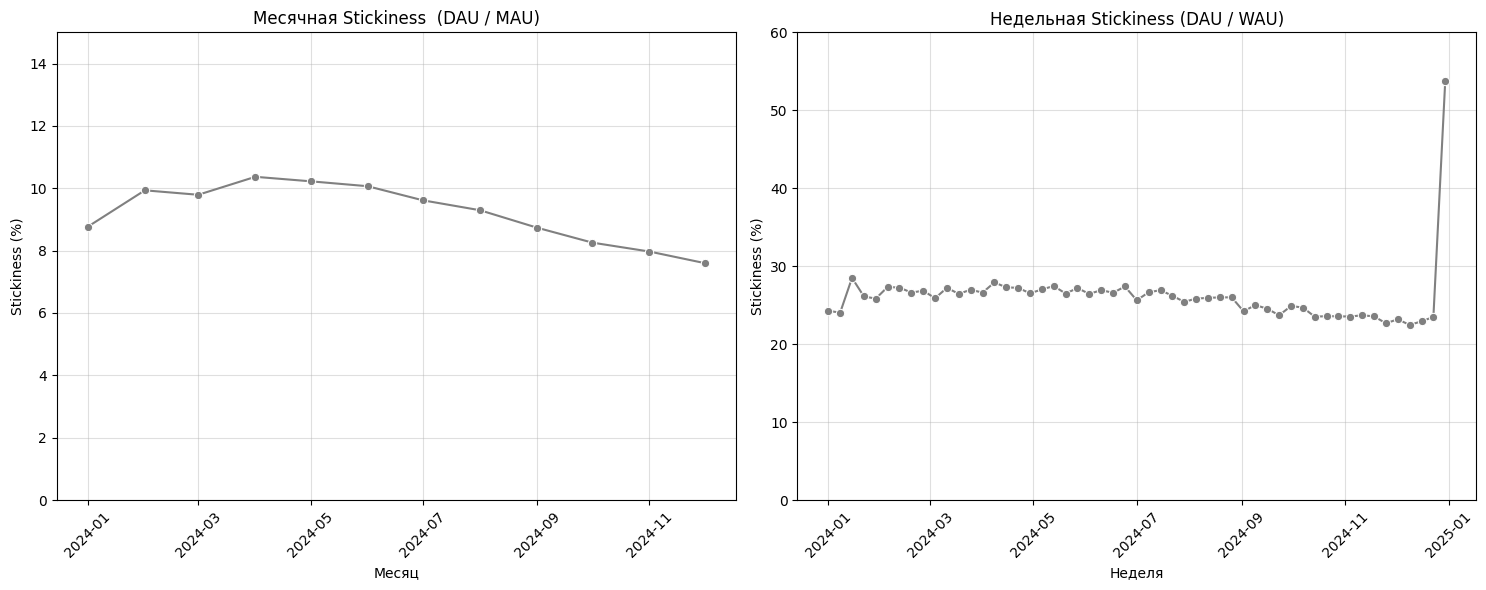

In [12]:
# Изменяем столбцы для группировки в исходном датафрейме
pa_diploma_sessions['session_week'] = pd.to_datetime(pa_diploma_sessions['session_start_day']).dt.to_period('W').dt.to_timestamp()
pa_diploma_sessions['session_month'] = pd.to_datetime(pa_diploma_sessions['session_start_day']).dt.to_period('M').dt.to_timestamp()

# Группировка данных
DAU_sessions = pa_diploma_sessions.groupby('session_start_day')['user_id'].nunique().reset_index()
WAU_sessions = pa_diploma_sessions.groupby('session_week')['user_id'].nunique().reset_index()
MAU_sessions = pa_diploma_sessions.groupby('session_month')['user_id'].nunique().reset_index()

# Переименование столбцов
DAU_sessions.rename(columns={'user_id': 'DAU'}, inplace=True)
WAU_sessions.rename(columns={'user_id': 'WAU'}, inplace=True)
MAU_sessions.rename(columns={'user_id': 'MAU'}, inplace=True)

# Добавляем столбцы для объединения к DAU_sessions
DAU_sessions['session_month'] = DAU_sessions['session_start_day'].dt.to_period('M').dt.to_timestamp()
DAU_sessions['session_week'] = DAU_sessions['session_start_day'].dt.to_period('W').dt.to_timestamp()

# расчет средних значений DAU
# Среднее DAU за месяц
dau_monthly = DAU_sessions.groupby('session_month')['DAU'].mean().reset_index()
dau_monthly.rename(columns={'DAU': 'avg_DAU'}, inplace=True)  

# Среднее DAU за неделю  
dau_weekly = DAU_sessions.groupby('session_week')['DAU'].mean().reset_index()
dau_weekly.rename(columns={'DAU': 'avg_DAU'}, inplace=True) 

# Объединение данных
stickiness_df_mau = pd.merge(dau_monthly, MAU_sessions, on='session_month', how='inner')
stickiness_df_wau = pd.merge(dau_weekly, WAU_sessions, on='session_week', how='inner')

# расчет stickiness
stickiness_df_mau['stickiness'] = (stickiness_df_mau['avg_DAU'] / stickiness_df_mau['MAU']) * 100
stickiness_df_wau['stickiness'] = (stickiness_df_wau['avg_DAU'] / stickiness_df_wau['WAU']) * 100

# Визуализация
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=stickiness_df_mau, x='session_month', y='stickiness', marker='o', color='gray')
plt.title('Месячная Stickiness  (DAU / MAU)')
plt.xlabel('Месяц')
plt.ylabel('Stickiness (%)')
plt.xticks(rotation=45)
plt.grid(alpha=.4)
plt.ylim(0, 15)

plt.subplot(1, 2, 2)
sns.lineplot(data=stickiness_df_wau, x='session_week', y='stickiness', marker='o', color='gray')
plt.title('Недельная Stickiness (DAU / WAU)')
plt.xlabel('Неделя')
plt.ylabel('Stickiness (%)')
plt.xticks(rotation=45)
plt.grid(alpha=.4)
plt.ylim(0, 60)

plt.tight_layout()
plt.show()


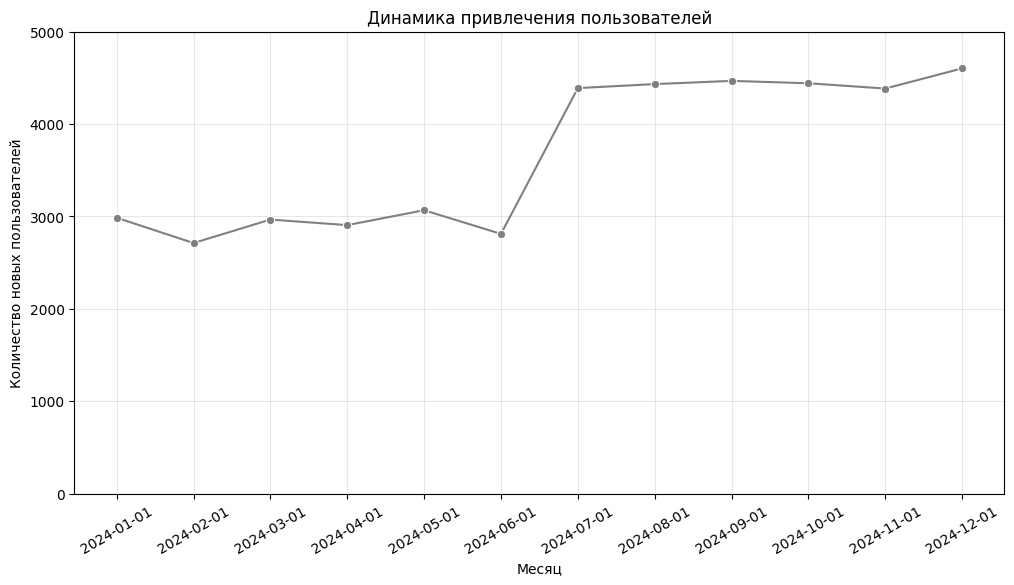

In [13]:
# Динамика привлечения пользователей
total_new_users = pa_diploma_users.groupby('cohort_month')['user_id'].nunique().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=total_new_users, x='cohort_month', y='user_id', marker='o', color='gray')
plt.title('Динамика привлечения пользователей')
plt.xlabel('Месяц')
plt.ylabel('Количество новых пользователей')
plt.xticks(rotation=30)
plt.grid(alpha=0.3)
plt.ylim(0, 5000)
plt.show()

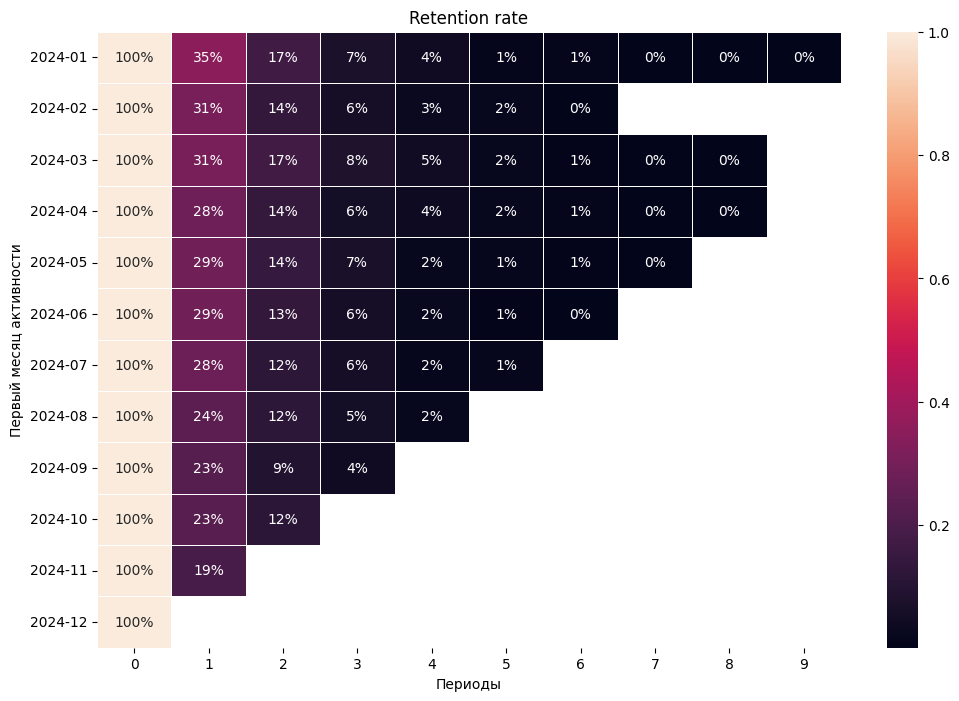

In [14]:
# Retention Rate
pa_diploma_orders['order_month'] = pd.to_datetime(pa_diploma_orders['order_month']).dt.to_period('M').dt.to_timestamp()

# Первый месяц активности
first_orders = pa_diploma_orders.groupby('user_id')['order_month'].min().reset_index()
first_orders.rename(columns={'order_month': 'first_order_month'}, inplace=True)

# Слияние
retention_df = pa_diploma_orders.merge(first_orders, on='user_id', how='left')

# Считаем количество месяцев
retention_df['N_month'] = (
    retention_df['order_month'].dt.to_period('M').astype(int) - 
    retention_df['first_order_month'].dt.to_period('M').astype(int))

# Построение таблицы
retention_pivot = retention_df.pivot_table(
    index='first_order_month',
    columns='N_month',
    values='user_id',
    aggfunc='nunique',
    fill_value=0)

# Нормализация
retention_pivot = retention_pivot.div(retention_pivot[0], axis=0)
retention_pivot[retention_pivot == 0] = float('nan')
retention_pivot.index = retention_pivot.index.strftime('%Y-%m')

plt.figure(figsize=(12, 8))
sns.heatmap(retention_pivot, annot=True, fmt='.0%', linewidths=0.5)
plt.title('Retention rate')
plt.xlabel('Периоды')
plt.ylabel('Первый месяц активности')
plt.show()

- Выручка имеет тенденцию к негативной динамике во второй половине 2024 года после резкого буста в начале года
- Резкое увеличение привлечения новых клиентов после июля 2024 года, но с падением ARPU - аудитория нецелевая или некачестванная
- Активность пользователей - значительное увеличение аудитории, но с признаками замедления роста
- Stickiness стабильна, но имеет тенденцию к падению
- Эффективность монетизации одного пользователя и размера среднего чека остается стабильной
- Retention стабильно низкий на протяжении всего года - треть на второй месяц использования и всего 10-20% на второй месяц с тенденцией к падению в течение года

### Оценка метрик монетизации и юнит-экономики

In [15]:
# Создаем один общий датафрейм для всей последующей работы
 
# Список сегментов
segments = ['os', 'device', 'gender', 'region', 'browser', 
            'acq_channel', 'user_segment', 'buyer_segment']

# Берем только нужную информацию
only_users_channels = pa_diploma_users[[
    'user_id', 'cohort_month', 'acq_channel', 'os', 
    'device', 'gender', 'region', 'browser', 
    'user_segment', 'buyer_segment']].copy()

# Объединяем данные с заказами
total_df_channels = only_users_channels.merge(
    pa_diploma_orders[['user_id', 'order_month', 'revenue']], 
    on='user_id', 
    how='left')
total_df_channels['revenue'] = total_df_channels['revenue'].fillna(0)
total_df_channels['order_month'] = total_df_channels['order_month'].fillna(total_df_channels['cohort_month'])
total_df_channels['cohort_month'] = pd.to_datetime(total_df_channels['cohort_month'])
total_df_channels['order_month'] = pd.to_datetime(total_df_channels['order_month'])

# Считаем N_month
total_df_channels['N_month'] = (
    pd.to_datetime(total_df_channels['order_month']).dt.to_period('M').astype(int) - 
    pd.to_datetime(total_df_channels['cohort_month']).dt.to_period('M').astype(int))

# Сортируем
total_df_channels.sort_values(by=['user_id', 'N_month'], inplace=True)

# Считаем LTV
total_df_channels['LTV'] = total_df_channels.groupby(['user_id'])['revenue'].transform('cumsum')


# CAC
# Количество привлеченных юников по каналам привлечения и месяцу
acquisited_users = pa_diploma_users.groupby(['acq_channel', 'cohort_month'])['user_id'].nunique().reset_index()
acquisited_users.rename(columns={'cohort_month': 'spend_month'}, inplace=True)

# Смена типов данных
acquisited_users['spend_month'] = pd.to_datetime(acquisited_users['spend_month'])
pa_diploma_campaign_costs['spend_month'] = pd.to_datetime(pa_diploma_campaign_costs['spend_month'])

# Датафрейм для расчета САС
cac_df = pd.merge(pa_diploma_campaign_costs, acquisited_users, on=['acq_channel', 'spend_month'])
cac_df.rename(columns={'user_id': 'acquisited_users'}, inplace=True)
cac_df['CAC'] = cac_df['budget'] / cac_df['acquisited_users']


# Объединяем данные с CAC
total_df_channels_with_cac = total_df_channels.merge(
    cac_df[['spend_month', 'acq_channel', 'CAC']], 
    left_on=['cohort_month', 'acq_channel'], 
    right_on=['spend_month', 'acq_channel'], 
    how='left')

total_df = total_df_channels_with_cac.copy()
total_df['ROI'] = (
    (total_df['LTV'] - total_df['CAC']) / 
    total_df['CAC'] * 100)


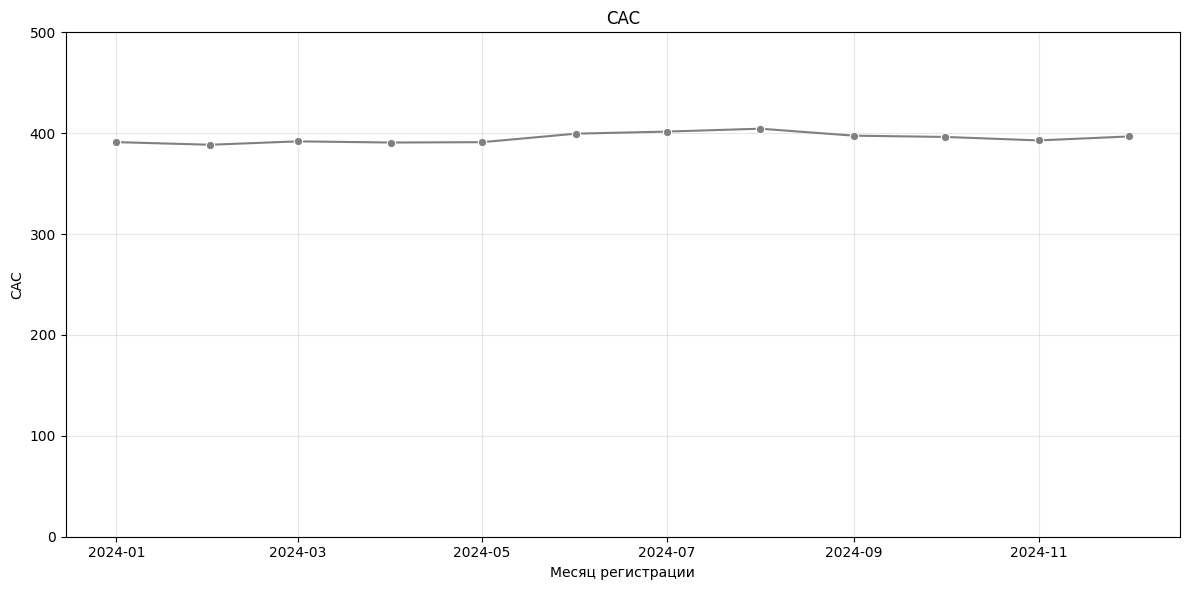

In [16]:
# CAC
mean_cac = total_df.groupby('cohort_month')['CAC'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_cac, x='cohort_month', y='CAC', marker='o', color='grey')
plt.title('CAC')
plt.xlabel('Месяц регистрации')
plt.ylabel('CAC')
plt.tight_layout()
plt.ylim(0, 500)
plt.grid(alpha=0.3)
plt.show()

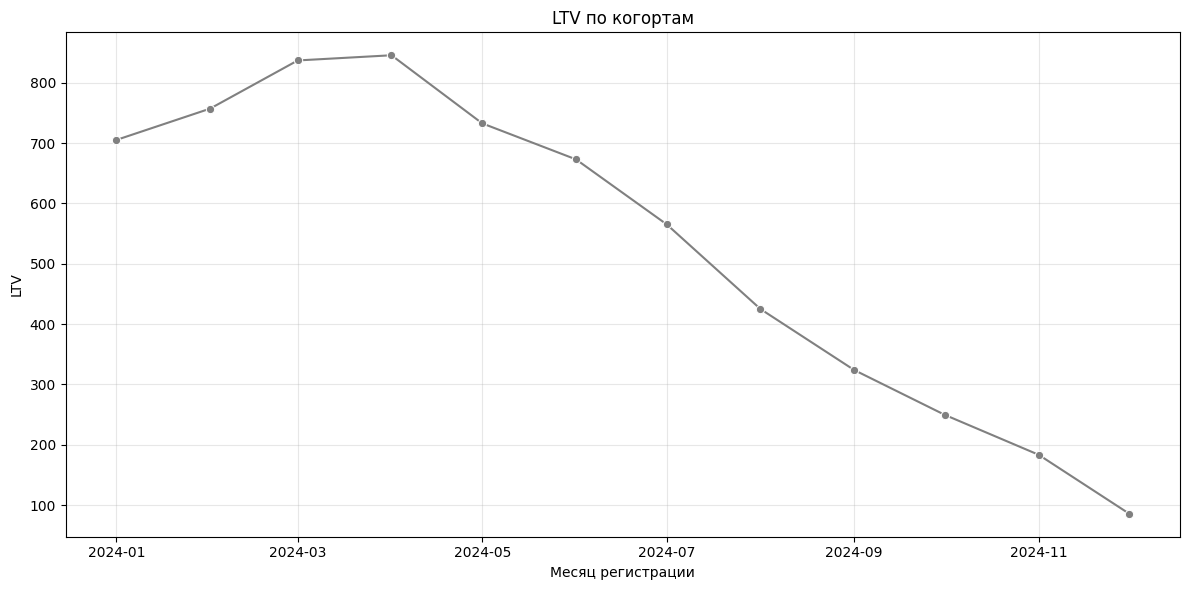

In [17]:
# Считаем LTV по месяцам
grouped_ltv = total_df.groupby(['cohort_month'])['revenue'].sum().reset_index()
grouped_users = total_df.groupby(['cohort_month'])['user_id'].nunique().reset_index()
grouped_ltv['LTV'] = grouped_ltv['revenue'] / grouped_users['user_id']

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_ltv, x='cohort_month', y='LTV', marker='o', color='grey')
plt.title('LTV по когортам')
plt.xlabel('Месяц регистрации')
plt.ylabel('LTV')
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()

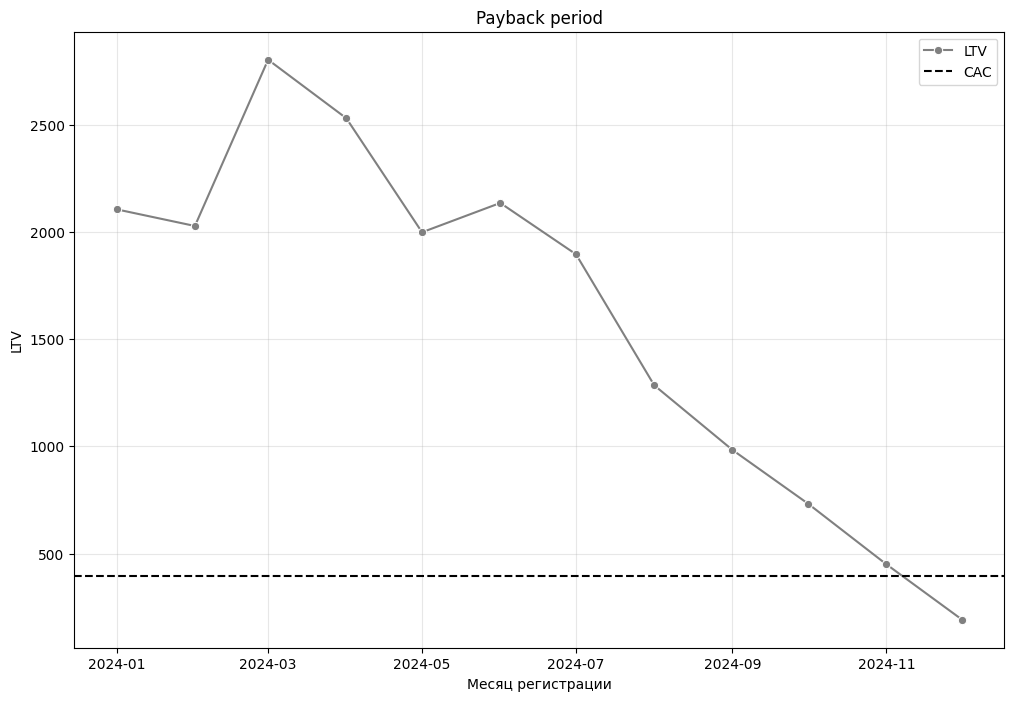

In [18]:
grouped_ltv_mean = total_df.groupby(['cohort_month'])['LTV'].mean().reset_index()
grouped_cac_mean = total_df['CAC'].mean()

plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped_ltv_mean, x='cohort_month', y='LTV', marker='o', color='grey', label='LTV')
plt.axhline(y=grouped_cac_mean, color='black', linestyle='--', label='CAC')
plt.xlabel('Месяц регистрации')
plt.ylabel('LTV')
plt.title('Payback period')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

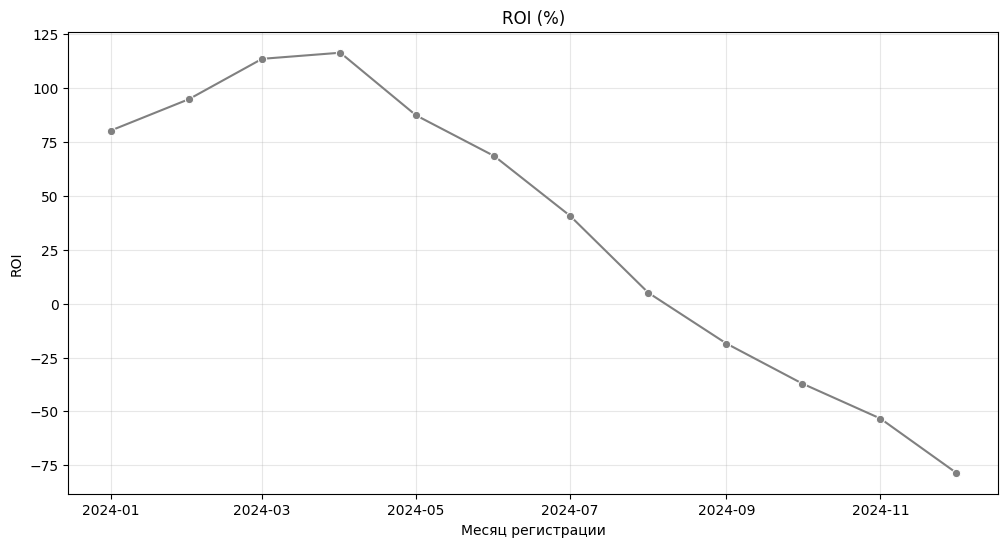

count     12.000000
mean      34.950548
std       68.730672
min      -78.460444
25%      -23.169339
50%       54.613061
75%       89.234242
max      116.415311
Name: roi, dtype: float64


In [19]:
# ROI соотношение
# Помесячный LTV: сумма выручки на пользователя в когорте
monthly_revenue = total_df.groupby('cohort_month')['revenue'].sum().reset_index()

# Размер когорт
cohort_sizes = total_df.groupby('cohort_month')['user_id'].nunique().reset_index()
cohort_sizes.rename(columns={'user_id': 'n_users'}, inplace=True)

ltv_by_month = monthly_revenue.merge(cohort_sizes, on='cohort_month', how='left')
ltv_by_month['ltv'] = ltv_by_month['revenue'] / ltv_by_month['n_users']

# Средний CAC
cac_by_month = total_df.groupby('cohort_month')['CAC'].mean().reset_index()

# ROI = (LTV - CAC) / CAC
roi_df = ltv_by_month[['cohort_month', 'ltv']].merge(cac_by_month, on='cohort_month', how='left')
roi_df['roi'] = (roi_df['ltv'] - roi_df['CAC']) / roi_df['CAC'] * 100


plt.figure(figsize=(12, 6))
sns.lineplot(data=roi_df, x='cohort_month', y='roi', marker='o', color='grey')
plt.title('ROI (%)')
plt.xlabel('Месяц регистрации')
plt.ylabel('ROI')
plt.grid(alpha=0.3)
plt.show()

print(roi_df['roi'].describe())

### Промежуточные выводы

- САС по каналам крайне стабилен, что говорит о стабильном качестве и количестве привлекаемой аудитории
- Рост аудитории не всегда означает улучшение экономики - наблюдается значительный рост WAU (с ~300 до 1200), но выручка падает во второй половине 2024 года
- Стабильность ARPPU/AOV при росте аудитории - показатели монетизации остаются в пределах 1400-1800 (ARPPU) и 650-750 (AOV), что указывает на качество привлекаемых платящих пользователей
    - Но коррелирующее падение Revenue и ARPU говорит о том, что количество платящих пользователей относительно всех привлеченных к концу года начало уменьшаться
- Разрыв между топ-линией и юнит экономикой - рост пользовательской базы не конвертируется в пропорциональный рост выручки
    - Нелояльность - клиенты возвращают стоимость их привлечения с первых же заказов, но удерживаются только 1-2 месяца
    - ROI показывает, что чем дальше мы привлекаем новых пользователей, тем более снижено их качество
- Все доходы существуют только за счет 15-20% пользователей в течение первых двух месяцев и всего 1-2% в последующие месяцы, что указывает на то, что большая часть привлеченных пользователей не использует продукт почти совсем
- **Текущие данные четко показывают, что проблема компании не в отсутствии пользователей, а в их качестве и недолговечности общения с продуктом**

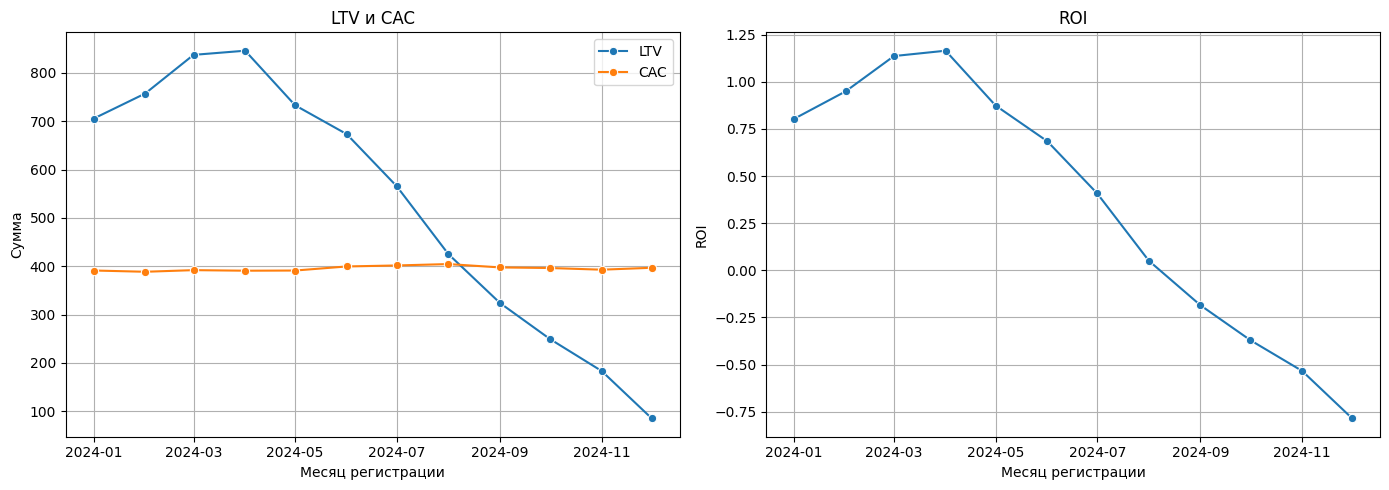

In [20]:
# Ячейка ревьюера:
# Помесячный LTV: сумма выручки на пользователя в когорте
monthly_revenue = total_df.groupby('cohort_month')['revenue'].sum().reset_index()

# Размер когорт
cohort_sizes = total_df.groupby('cohort_month')['user_id'].nunique().reset_index()
cohort_sizes.rename(columns={'user_id': 'n_users'}, inplace=True)

ltv_by_month = monthly_revenue.merge(cohort_sizes, on='cohort_month', how='left')
ltv_by_month['ltv'] = ltv_by_month['revenue'] / ltv_by_month['n_users']

# Средний CAC
cac_by_month = total_df.groupby('cohort_month')['CAC'].mean().reset_index()

# ROI = (LTV - CAC) / CAC
roi_df = ltv_by_month[['cohort_month', 'ltv']].merge(cac_by_month, on='cohort_month', how='left')
roi_df['roi'] = (roi_df['ltv'] - roi_df['CAC']) / roi_df['CAC']

# Визуализируем результат
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

# Левый график: LTV и CAC вместе
sns.lineplot(data=roi_df, x='cohort_month', y='ltv', marker='o', ax=axes[0], label='LTV')
sns.lineplot(data=roi_df, x='cohort_month', y='CAC', marker='o', ax=axes[0], label='CAC')
axes[0].set_title('LTV и CAC')
axes[0].set_ylabel('Сумма')
axes[0].grid(True)
axes[0].legend()
axes[0].set_xlabel('Месяц регистрации')

# Правый график: ROI
sns.lineplot(data=roi_df, x='cohort_month', y='roi', marker='o', ax=axes[1])
axes[1].set_title('ROI')
axes[1].set_ylabel('ROI')
axes[1].grid(True)
axes[1].set_xlabel('Месяц регистрации')

plt.tight_layout()
plt.show()

#### Более глубокий анализ

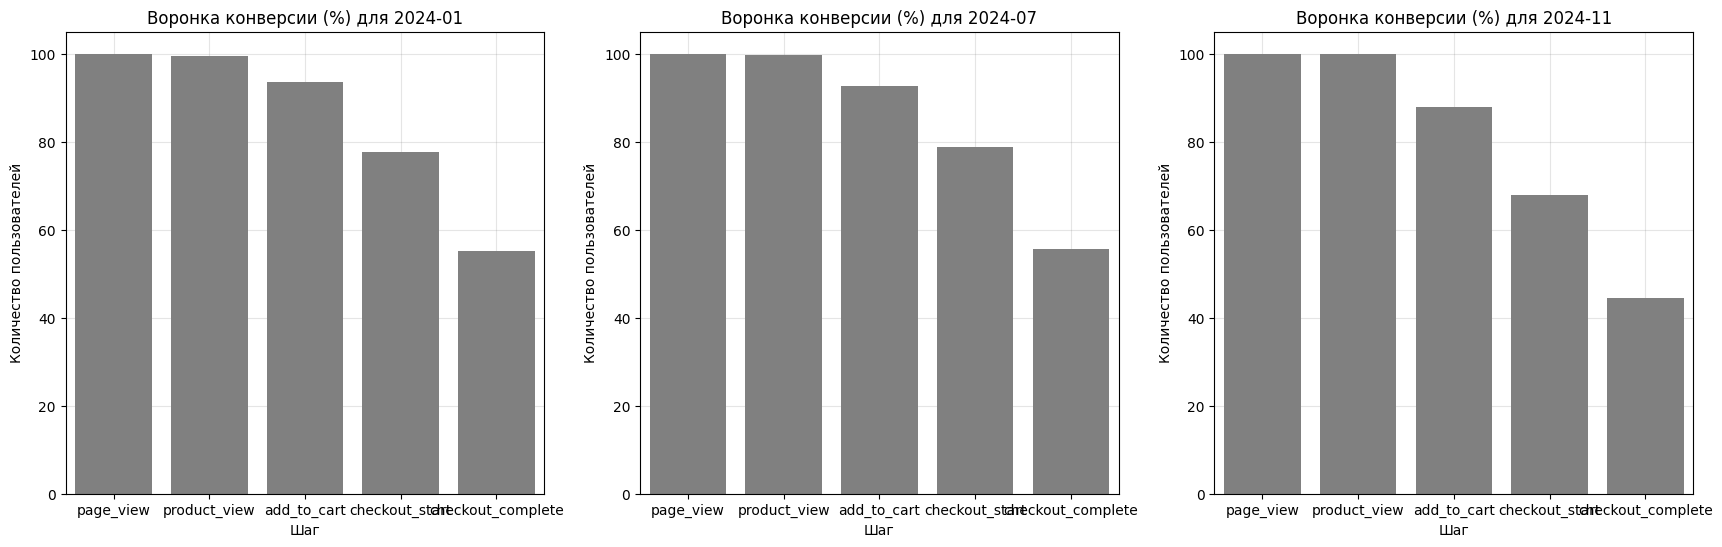

In [21]:
# Воронка конверсии
funnel_steps = ['page_view', 'product_view', 'add_to_cart', 'checkout_start', 'checkout_complete']
users_01 = pa_diploma_events.query('event_month == "2024-01-01"')
users_07 = pa_diploma_events.query('event_month == "2024-07-01"')
users_11 = pa_diploma_events.query('event_month == "2024-11-01"')
# Подсчет количества пользователей на каждом шаге
plt.figure(figsize=(21, 6))

cohorts = [users_01, users_07, users_11]
months = ['2024-01', '2024-07', '2024-11']
for i, cohort in enumerate(cohorts):
    funnel_count = (
    cohort[cohort['event_type'].isin(funnel_steps)]
    .groupby('event_type', as_index=False)['user_id']
    .nunique()
    .rename(columns={'event_type': 'step', 'user_id': 'total_users'})
    .sort_values(by='total_users', ascending=False))

    # Конверсия от первого шага
    funnel_count['conversion%'] = (
        funnel_count['total_users'] / 
        funnel_count['total_users'].iloc[0] * 100).round(2)

    # Визуализация воронки
    plt.subplot(1, 3, i+1)
    sns.barplot(data=funnel_count, x='step', y='conversion%', color='grey')
    plt.title(f'Воронка конверсии (%) для {months[i]}')
    plt.xlabel('Шаг')
    plt.ylabel('Количество пользователей')
    plt.grid(alpha=0.2, color='grey')
plt.show()

In [22]:
# Создаем датафрейм с пользователями TikTok
tt_df_events = pa_diploma_events.merge(pa_diploma_users[['user_id', 'acq_channel']], on='user_id', how='left')
tt_df_events = tt_df_events.query('acq_channel == "TikTok"')

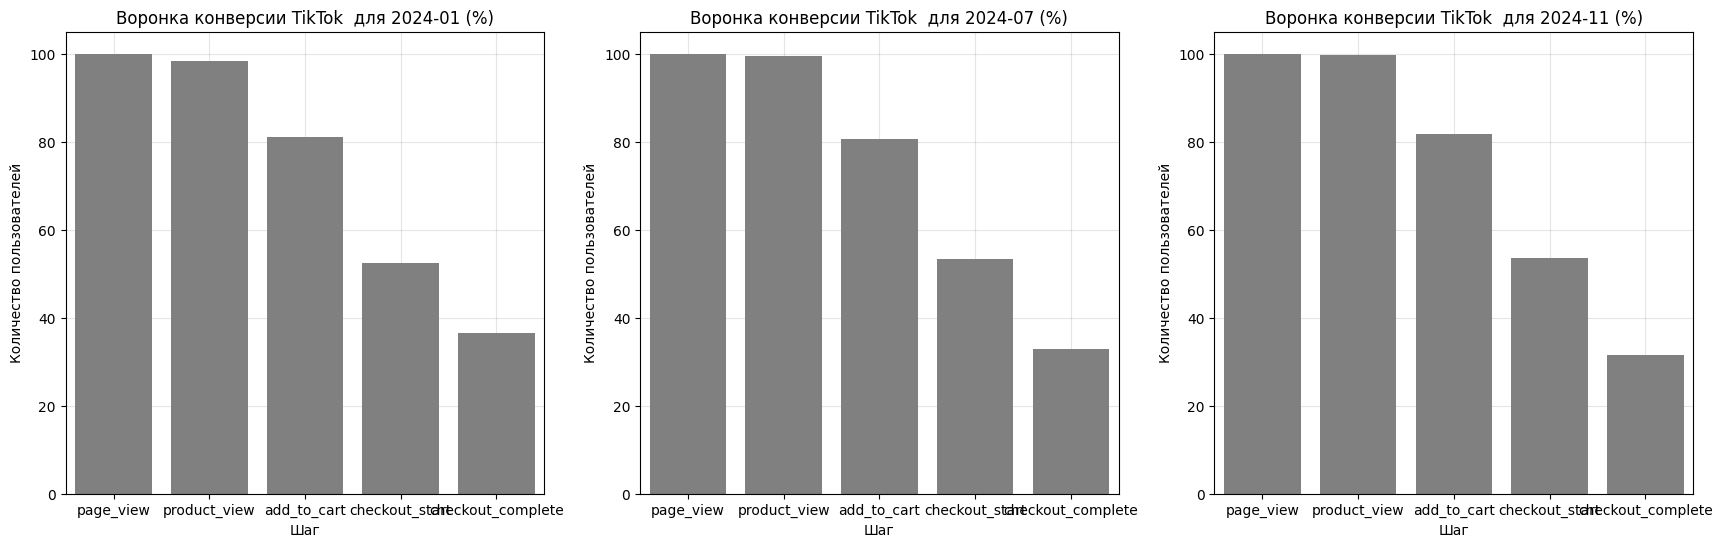

In [23]:
# Воронка конверсии TikTok
funnel_steps = ['page_view', 'product_view', 'add_to_cart', 'checkout_start', 'checkout_complete']
users_01_tt = tt_df_events.query('event_month == "2024-01-01"')
users_07_tt = tt_df_events.query('event_month == "2024-07-01"')
users_11_tt = tt_df_events.query('event_month == "2024-11-01"')
# Подсчет количества пользователей на каждом шаге
plt.figure(figsize=(21, 6))

cohorts_tt = [users_01_tt, users_07_tt, users_11_tt]
months_tt = ['2024-01', '2024-07', '2024-11']
for i, cohort in enumerate(cohorts_tt):
    funnel_count = (
    cohort[cohort['event_type'].isin(funnel_steps)]
    .groupby('event_type', as_index=False)['user_id']
    .nunique()
    .rename(columns={'event_type': 'step', 'user_id': 'total_users'})
    .sort_values(by='total_users', ascending=False))

    # Конверсия от первого шага
    funnel_count['conversion%'] = (
        funnel_count['total_users'] / 
        funnel_count['total_users'].iloc[0] * 100).round(2)

    # Визуализация воронки
    plt.subplot(1, 3, i+1)
    sns.barplot(data=funnel_count, x='step', y='conversion%', color='grey')
    plt.title(f'Воронка конверсии TikTok  для {months[i]} (%)')
    plt.xlabel('Шаг')
    plt.ylabel('Количество пользователей')
    plt.grid(alpha=0.2, color='grey')
plt.show()

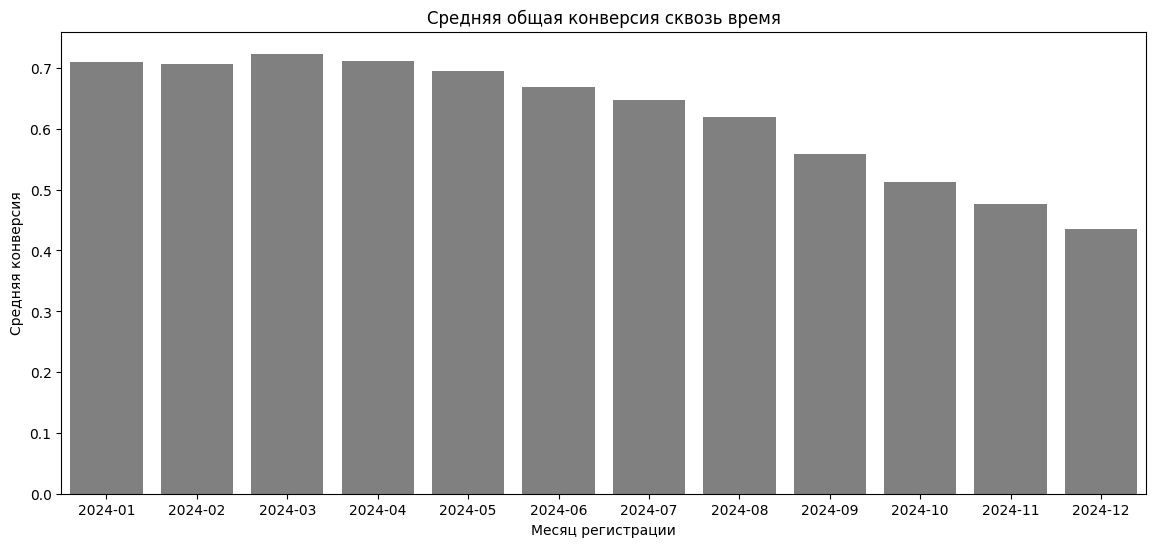

In [24]:
# Конверсия
# Добавляем данные о когороте
pre_cr_df = pa_diploma_events.merge(total_df[['user_id', 'cohort_month']], on='user_id', how='right')

# Все пользователи на 1 этапе
page_view_users = (
    pre_cr_df
    .query('event_type == "page_view"')
    .groupby(['cohort_month'])
    ['user_id']
    .nunique()
    .reset_index())

# Все пользователи на целевом этапе
checkout_complete_users = (
    pre_cr_df
    .query('event_type == "checkout_complete"')
    .groupby(['cohort_month'])
    ['user_id']
    .nunique()
    .reset_index())

# Конверсия
conversion_df = pd.merge(page_view_users, checkout_complete_users, on=['cohort_month'])
conversion_df['CR'] = conversion_df['user_id_y'] / conversion_df['user_id_x']
conversion_df['cohort_month'] = pd.to_datetime(conversion_df['cohort_month']).dt.to_period('M')

plt.figure(figsize=(14, 6))
sns.barplot(data=conversion_df, x='cohort_month', y='CR', color='grey')
plt.title('Средняя общая конверсия сквозь время')
plt.xlabel('Месяц регистрации')
plt.ylabel('Средняя конверсия')
plt.show()

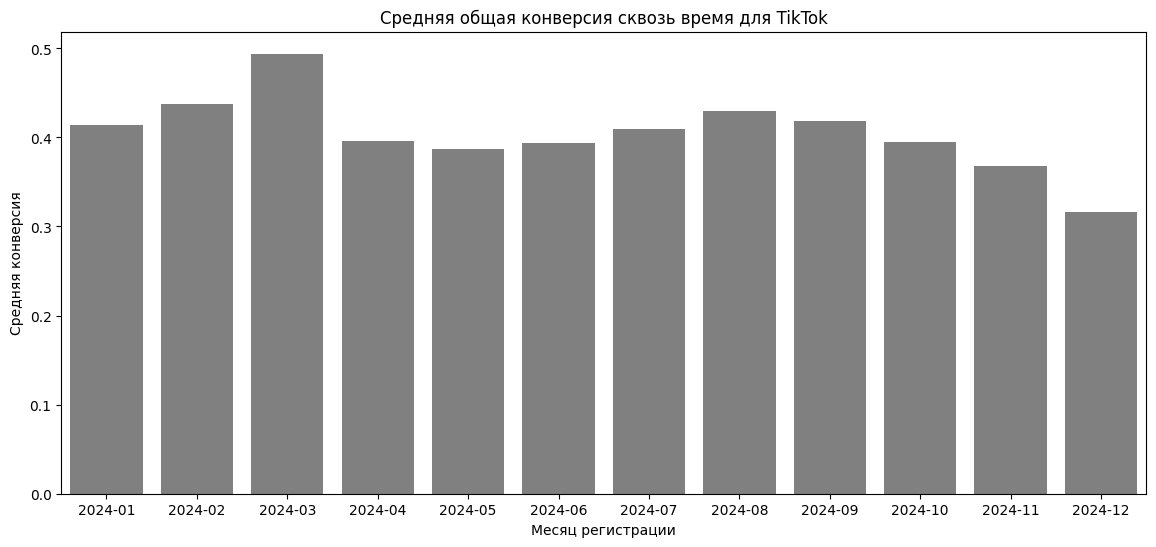

In [25]:
# Конверсия для канал привлечения TikTok
# Добавляем данные о когороте

pre_cr_df_tt = tt_df_events.merge(total_df[['user_id', 'cohort_month']], on='user_id')

# Все пользователи на 1 этапе
page_view_users_tt = (
    pre_cr_df_tt
    .query('event_type == "page_view"')
    .groupby(['cohort_month'])
    ['user_id']
    .nunique()
    .reset_index())

# Все пользователи на целевом этапе
checkout_complete_users_tt = (
    pre_cr_df_tt
    .query('event_type == "checkout_complete"')
    .groupby(['cohort_month'])
    ['user_id']
    .nunique()
    .reset_index())

# Конверсия
conversion_df_tt = pd.merge(page_view_users_tt, checkout_complete_users_tt, on=['cohort_month'])
conversion_df_tt['CR'] = conversion_df_tt['user_id_y'] / conversion_df_tt['user_id_x']
conversion_df_tt['cohort_month'] = pd.to_datetime(conversion_df_tt['cohort_month']).dt.to_period('M')

plt.figure(figsize=(14, 6))
sns.barplot(data=conversion_df_tt, x='cohort_month', y='CR', color='grey')
plt.title('Средняя общая конверсия сквозь время для TikTok')
plt.xlabel('Месяц регистрации')
plt.ylabel('Средняя конверсия')
plt.show()

- На основе этих данных очевиден спад показателей конверсии к концу года на каждом ее шаге

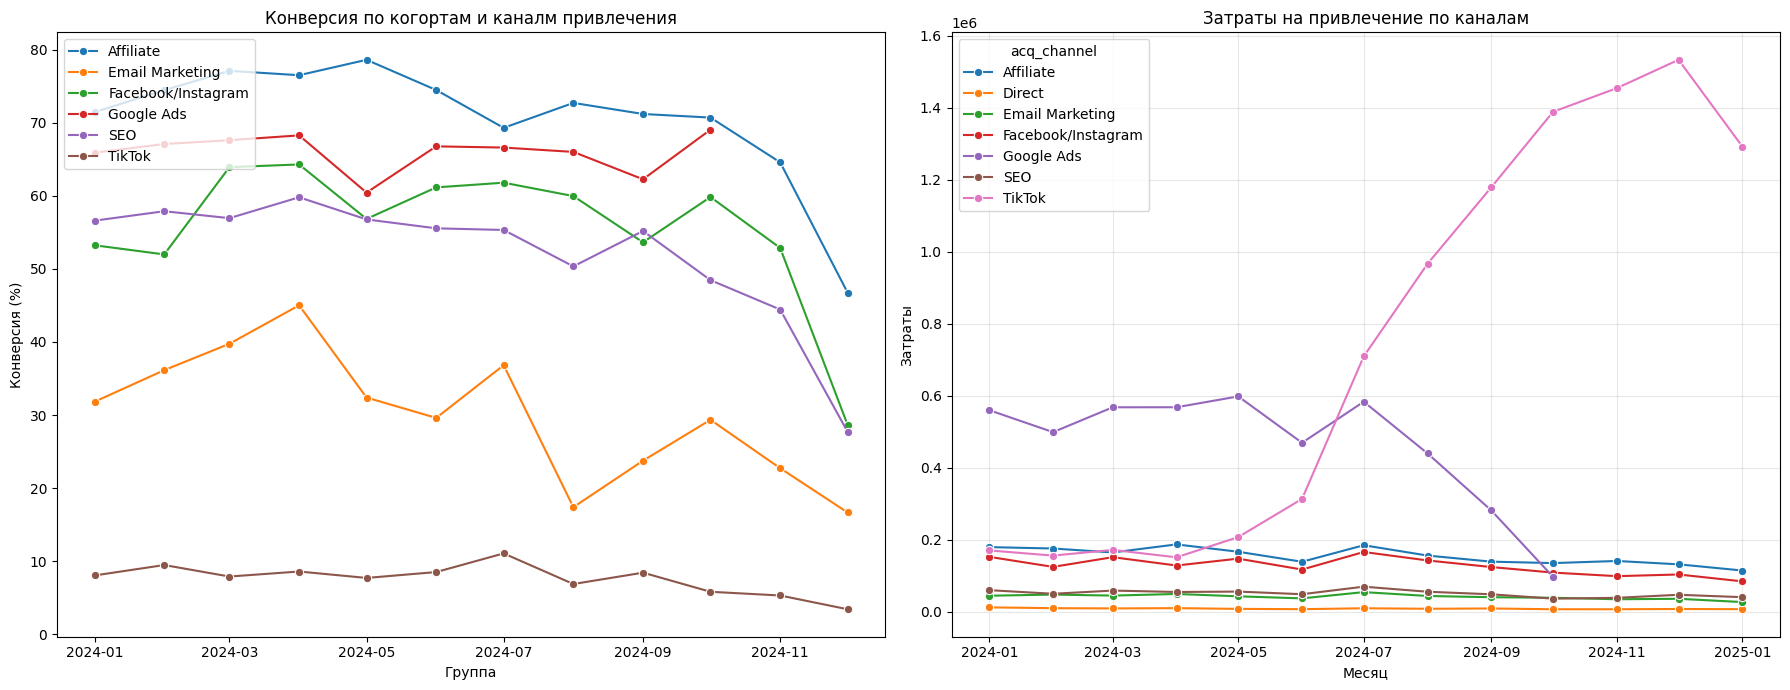

In [26]:
# Создаем признак конверсии
total_df['conversion'] = ((total_df['revenue'] > 0) & (total_df['revenue'].notna())).astype(int)

cr_df_channels = total_df.groupby(['acq_channel', 'cohort_month']).agg({
    'conversion': 'sum',
    'user_id': 'count'
}).reset_index()

cr_df_channels = cr_df_channels.rename(columns={'user_id': 'total_users'})

cr_df_channels['CR%'] = cr_df_channels['conversion'] / cr_df_channels['total_users'] * 100

plt.figure(figsize=(18, 7))
plt.subplot(1, 2, 1)
sns.lineplot(
    data=cr_df_channels, 
    x='cohort_month', 
    y='CR%', 
    hue='acq_channel', 
    marker='o')
plt.title('Конверсия по когортам и каналм привлечения')
plt.xlabel('Группа')
plt.ylabel('Конверсия (%)')
plt.xticks(rotation=0)
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
sns.lineplot(
    data=pa_diploma_campaign_costs, 
    x='spend_month', 
    y='budget', 
    hue='acq_channel', 
    marker='o')
plt.title(f'Затраты на привлечение по каналам')
plt.xlabel('Месяц')
plt.ylabel('Затраты')
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

- Наблюдается сильный вклад в развитие источника траффика TikTok, но без соответствующего успеха

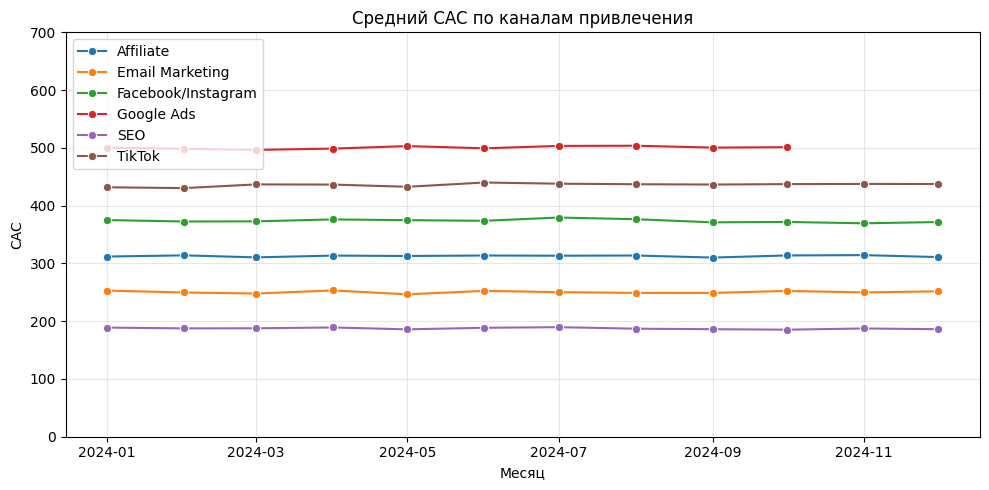

In [27]:
# Считаем САС по каналам привлечения
grouped_cac_channels = total_df.groupby(['acq_channel', 'cohort_month'])['CAC'].mean().reset_index()

# Отрисовка 
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=grouped_cac_channels, 
    x='cohort_month', 
    y='CAC', 
    hue='acq_channel', 
    marker='o', 
    legend=True)
plt.title(f'Средний CAC по каналам привлечения')
plt.xlabel('Месяц')
plt.ylabel('CAC')
plt.grid(alpha=0.3)
plt.legend(loc='upper left')
plt.ylim(0, 700)
plt.tight_layout()
plt.show()

- Стоимость привлечения крайне стабильна на протяжении всего исследуемого периода

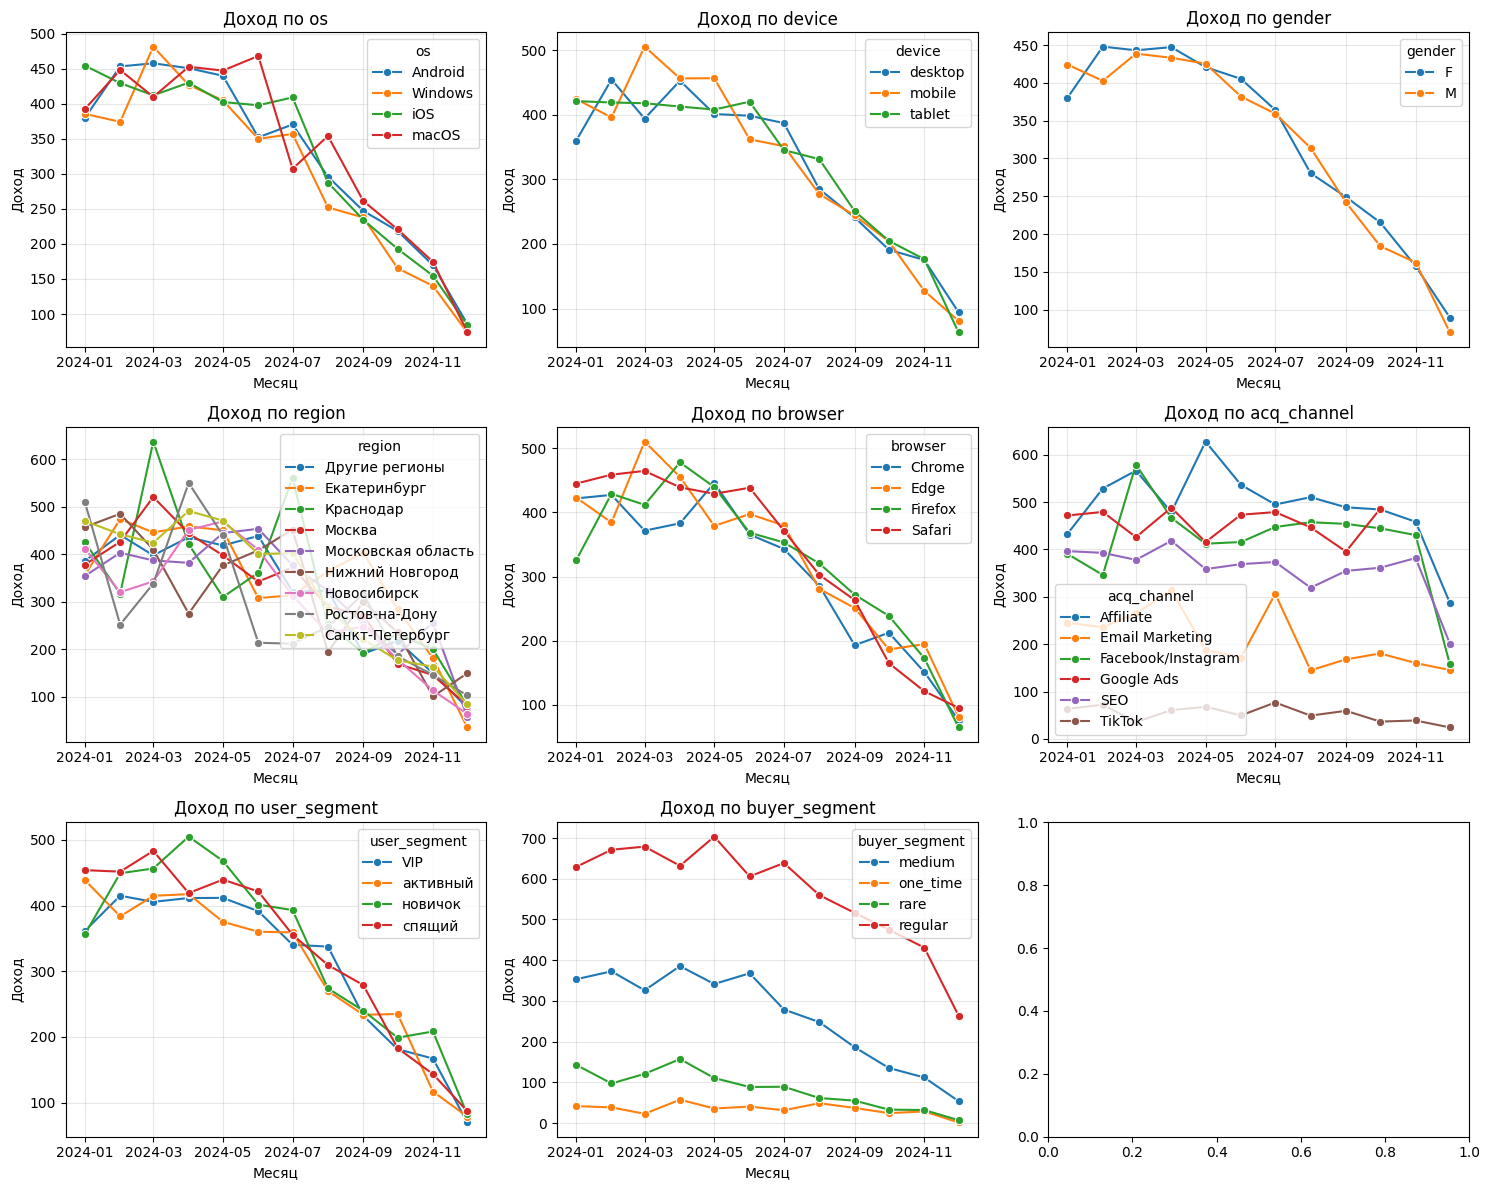

In [28]:
# Revenue по когортам
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten() 

for i, segment in enumerate(segments):
    # ROI соотношение
    revenue_data = total_df.groupby([segment, 'cohort_month']).agg({
        'revenue': 'mean',
        }).reset_index()

    sns.lineplot(
        data=revenue_data, 
        x='cohort_month', 
        y='revenue', 
        hue=segment, 
        marker='o', 
        legend=True,
        ax=axes[i])
    
    axes[i].set_title(f'Доход по {segment}')
    axes[i].set_xlabel('Месяц')
    axes[i].set_ylabel('Доход')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()    

- Очевидно падение доходности почти по всем каналам и когортам к концу года

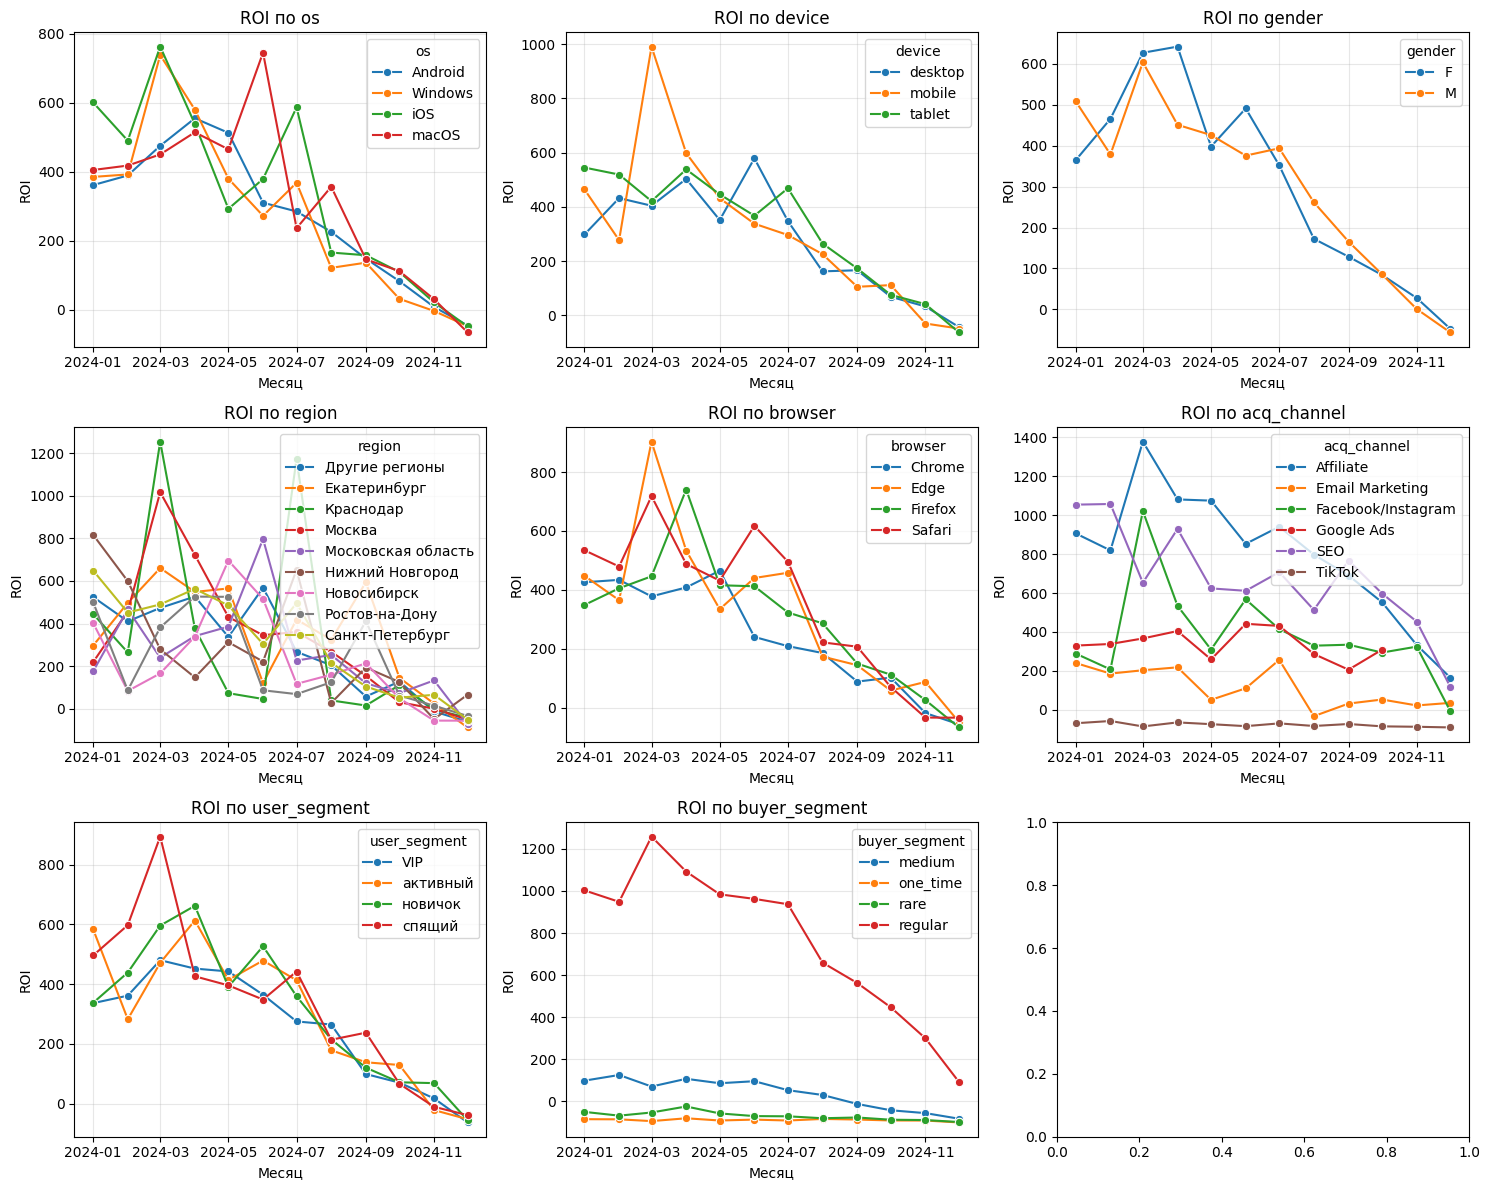

In [29]:
# ROI по когортам
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten() 

for i, segment in enumerate(segments):
    # ROI соотношение
    roi_data = total_df.groupby([segment, 'cohort_month']).agg({
        'LTV': 'mean',
        'CAC': 'mean'
        }).reset_index()

    roi_data['ROI'] = (roi_data['LTV'] - roi_data['CAC']) / roi_data['CAC'] * 100

    sns.lineplot(
        data=roi_data, 
        x='cohort_month', 
        y='ROI', 
        hue=segment, 
        marker='o', 
        legend=True,
        ax=axes[i])
    
    axes[i].set_title(f'ROI по {segment}')
    axes[i].set_xlabel('Месяц')
    axes[i].set_ylabel('ROI')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()    

- Аналогичная ситуация и с ROI

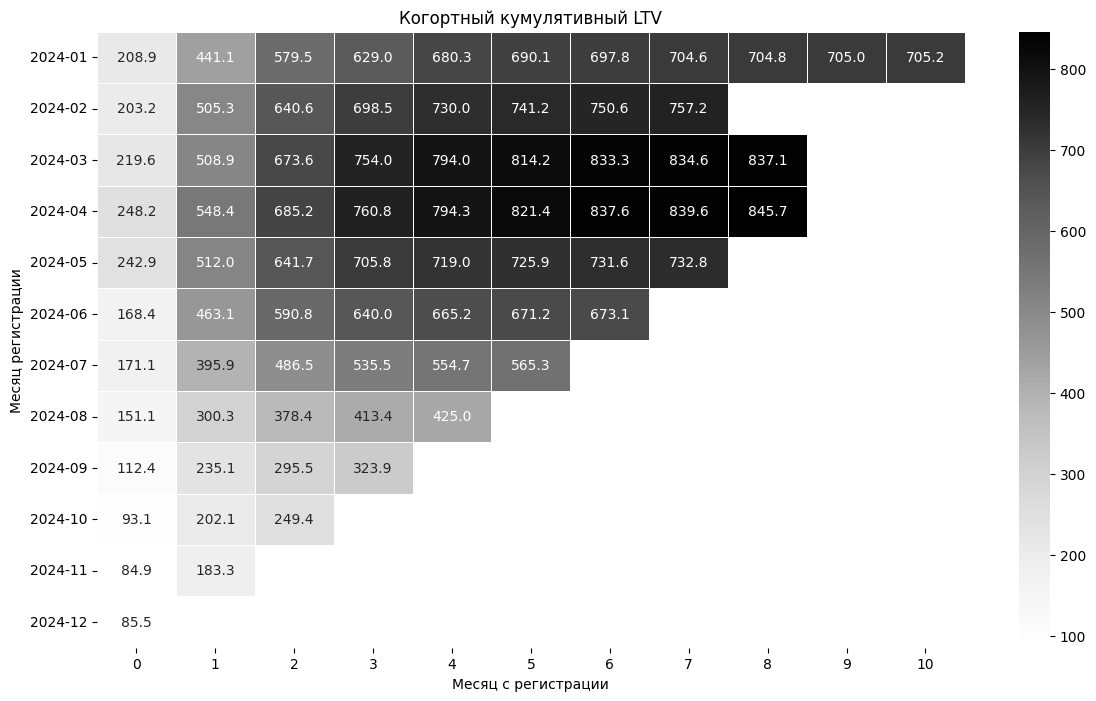

In [30]:
# Когортный LTV
cohort_ltv = total_df.groupby(['cohort_month', 'N_month'])['revenue'].sum().reset_index()
cohort_ltv = cohort_ltv.sort_values(['cohort_month', 'N_month'])
cohort_ltv['total_revenue_cum'] = cohort_ltv.groupby('cohort_month')['revenue'].cumsum()

# Размер когорты
cohort_size = total_df.groupby('cohort_month')['user_id'].nunique().reset_index()

# Объединение
cohort_ltv = cohort_ltv.merge(cohort_size, on=['cohort_month'])

# Средний LTV
cohort_ltv['ltv'] = cohort_ltv['total_revenue_cum'] / cohort_ltv['user_id']

# Перевод в период
cohort_ltv['cohort_month'] = cohort_ltv['cohort_month'].dt.to_period('M')

pivot_ltv = cohort_ltv.pivot(
    index='cohort_month',
    columns='N_month',
    values='ltv')

plt.figure(figsize=(14, 8))
sns.heatmap(
    pivot_ltv,
    cmap='Greys',
    linewidths=0.5,
    annot=True,
    fmt='.1f')

plt.xlabel('Месяц с регистрации')
plt.ylabel('Месяц регистрации')
plt.title('Когортный кумулятивный LTV')
plt.show()

- Наблюдается постепенное ухудшение показателей после июля и вплоть до конца года

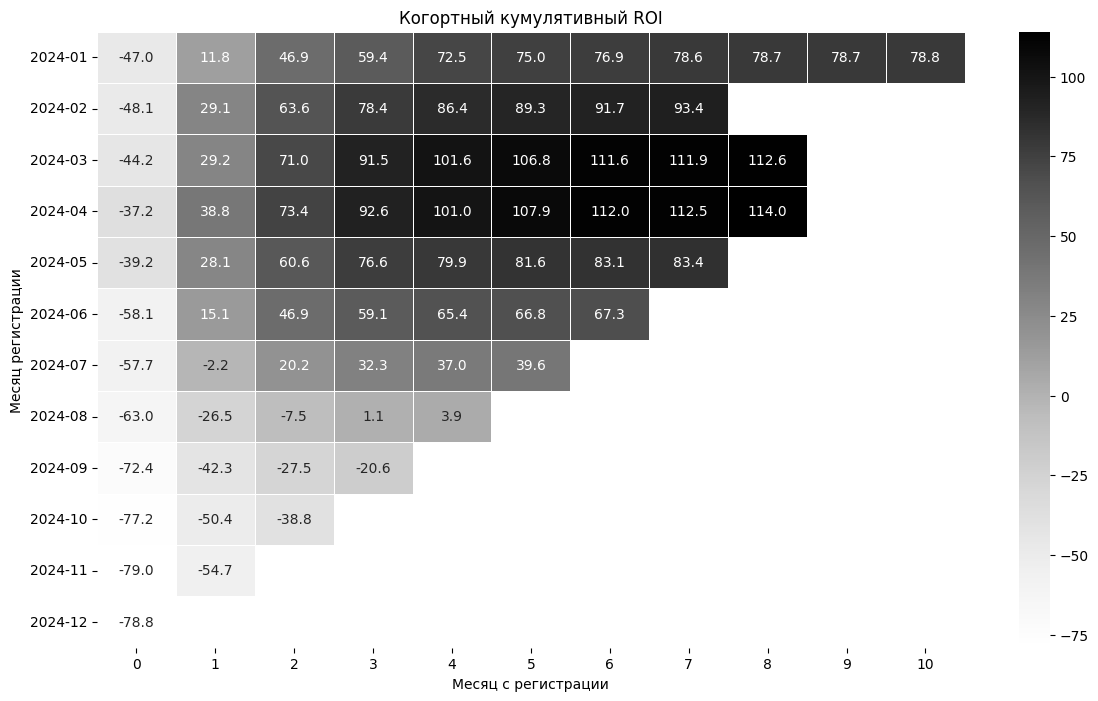

In [31]:
# Когортный CAC
cohort_cac = pa_diploma_campaign_costs.groupby(['spend_month'])['budget'].sum().reset_index()
cohort_cac = cohort_cac.merge(cohort_size, left_on=['spend_month'], right_on=['cohort_month'])
cohort_cac['CAC'] = cohort_cac['budget'] / cohort_cac['user_id']
cohort_cac['cohort_month'] = cohort_cac['spend_month'].dt.to_period('M')

# Когортный ROI
cohort_roi = cohort_ltv.merge(cohort_cac, on='cohort_month')
cohort_roi['ROI'] = (cohort_roi['ltv'] - cohort_roi['CAC']) / cohort_roi['CAC'] * 100

pivot_roi = cohort_roi.pivot(
    index='cohort_month',
    columns='N_month',
    values='ROI')

plt.figure(figsize=(14, 8))
sns.heatmap(
    pivot_roi,
    cmap='Greys',
    linewidths=0.5,
    annot=True,
    fmt='.1f')

plt.xlabel('Месяц с регистрации')
plt.ylabel('Месяц регистрации')
plt.title('Когортный кумулятивный ROI')
plt.show()

In [32]:
segment_performance = []

segmentations = ['os', 'device', 'gender',  'browser', 'acq_channel']

# Проходим по каждому сегменту и подсегменту
for segment in segmentations:
    for subsegment in total_df[segment].unique():
        segment_data = total_df.query(f'{segment} == @subsegment').copy()
        segment_data.sort_values(by='cohort_month', inplace=True)

        first_half_year = segment_data.query('cohort_month < "2024-06-01"')
        second_half_year = segment_data.query('cohort_month >= "2024-06-01"')

        first_half_revenue = first_half_year['revenue'].sum() / first_half_year['user_id'].nunique()
        second_half_revenue = second_half_year['revenue'].sum() / second_half_year['user_id'].nunique()
        revenue_change = (second_half_revenue - first_half_revenue) / first_half_revenue * 100

        first_half_roi = first_half_year['ROI'].mean()
        second_half_roi = second_half_year['ROI'].mean()
        roi_change = (second_half_roi - first_half_roi) / first_half_roi * 100
        

        segment_performance.append({
            'segment': segment,
            'subsegment': subsegment,
            'first_half_revenue': first_half_revenue,
            'second_half_revenue': second_half_revenue,
            'revenue_change': revenue_change,
            'first_half_roi': first_half_roi,
            'second_half_roi': second_half_roi,
            'roi_change': roi_change})

# Создаем DataFrame с результатами
performance_df = pd.DataFrame(segment_performance)

# Сортируем по roi_change
problematic = performance_df.sort_values('revenue_change').head(10)

# Выводим результаты
print('Самые убыточные сегменты по доходности в %:')
problematic


Самые убыточные сегменты по доходности в %:


segment subsegment  first_half_revenue  second_half_revenue  \
5    device     mobile          833.786454           317.215122   
3        os    Windows          782.582822           298.905650   
12  browser     Safari          826.316947           345.680223   
2        os    Android          801.063428           340.374039   
7    gender          M          771.107817           333.024007   
11  browser     Chrome          696.409006           304.347814   
10  browser       Edge          804.038542           354.126360   
8    gender          F          779.272937           344.908267   
6    device     tablet          769.454554           349.415685   
9   browser    Firefox          776.094988           352.562059   

    revenue_change  first_half_roi  second_half_roi  roi_change  
5       -61.954872      648.157593       175.626725  -72.903700  
3       -61.805238      547.786442       161.533545  -70.511584  
12      -58.166146      590.529532       269.936069  -54.289150  
2       -57.509727      515.305355       196.877659  -61.793982  
7       -56.812264      534.390207       228.343488  -57.270271  
11      -56.297548      467.445478       148.332474  -68.267428  
10      -55.956544      612.726503       227.544969  -62.863534  
8       -55.739735      573.862691       206.732390  -63.975286  
6       -54.589172      565.615453       238.541736  -57.826164  
9       -54.572306      541.011367       222.813203  -58.815430

In [33]:
# Создаем функцию для анализа когорт в виде тепловой карты
def cohort_analysis(heatmap_df):
    cohort_ltv = heatmap_df.groupby(['cohort_month', 'N_month'])['revenue'].sum().reset_index()
    cohort_ltv = cohort_ltv.sort_values(['cohort_month', 'N_month'])
    cohort_ltv['total_revenue_cum'] = cohort_ltv.groupby('cohort_month')['revenue'].cumsum()

    cohort_size = heatmap_df.groupby('cohort_month')['user_id'].nunique().reset_index()
    cohort_ltv = cohort_ltv.merge(cohort_size, on=['cohort_month'])

    cohort_ltv['ltv'] = cohort_ltv['total_revenue_cum'] / cohort_ltv['user_id']

    cohort_ltv['cohort_month'] = cohort_ltv['cohort_month'].dt.to_period('M')

    pivot_ltv = cohort_ltv.pivot(
        index='cohort_month',
        columns='N_month',
        values='ltv')

    plt.figure(figsize=(10, 5))
    sns.heatmap(
        pivot_ltv,
        cmap='Greys',
        linewidths=0.5,
        annot=True,
        fmt='.1f')

    plt.xlabel('Месяц с регистрации')
    plt.ylabel('Месяц регистрации')
    plt.title(f'LTV по {segment}')
    plt.show()

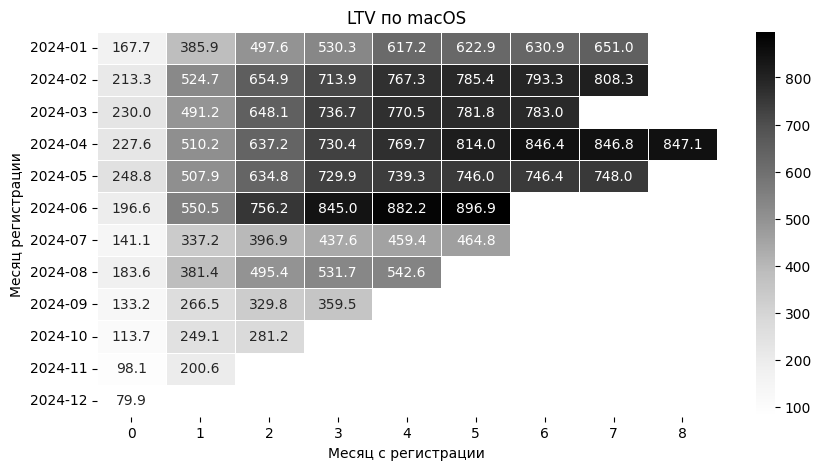

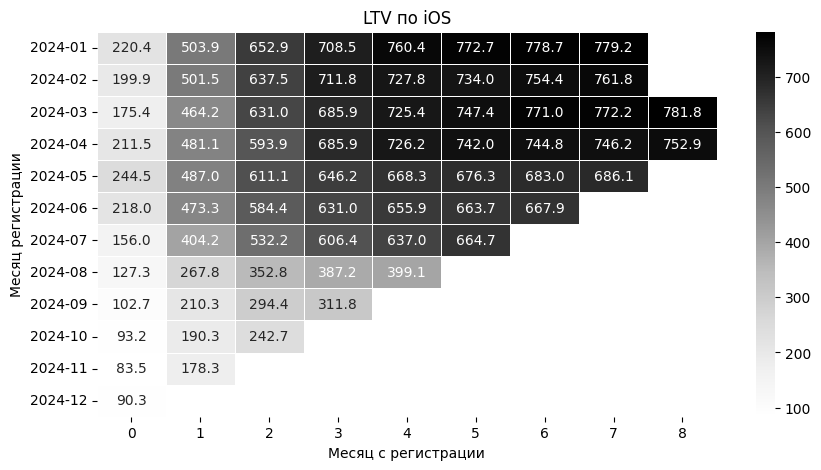

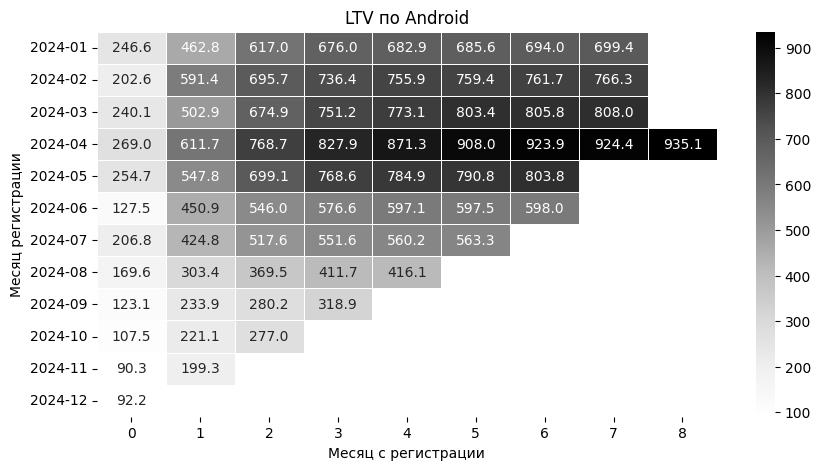

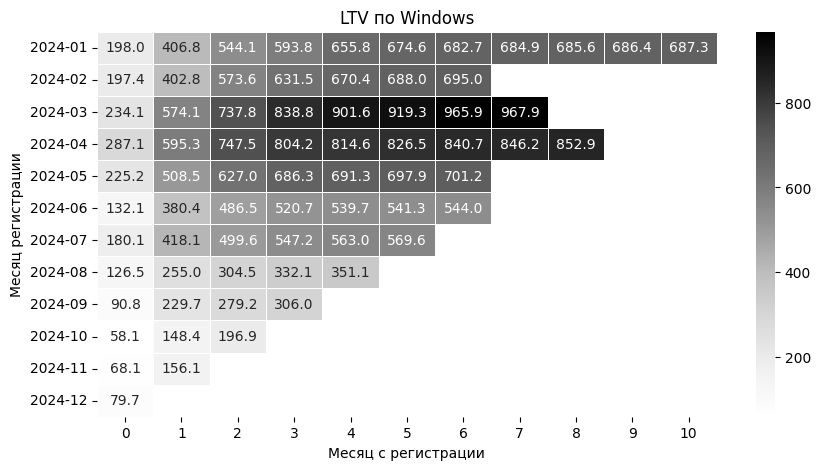

In [34]:
for segment in total_df['os'].unique():
    heatmap_df = total_df.query('os == @segment')
    cohort_analysis(heatmap_df)

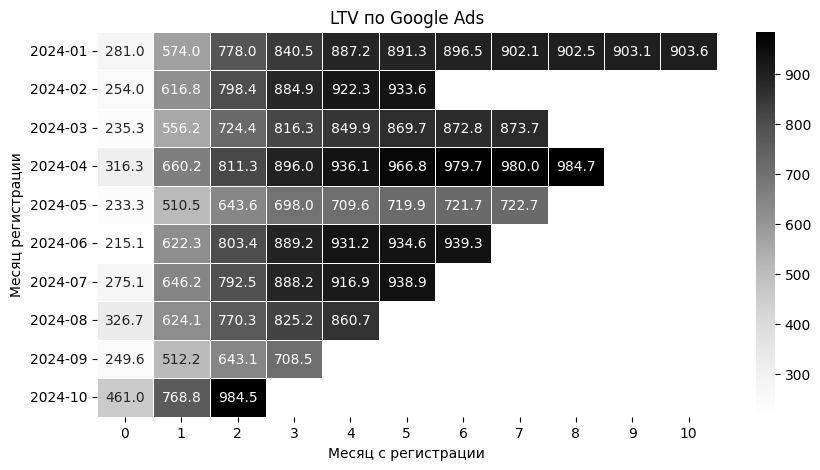

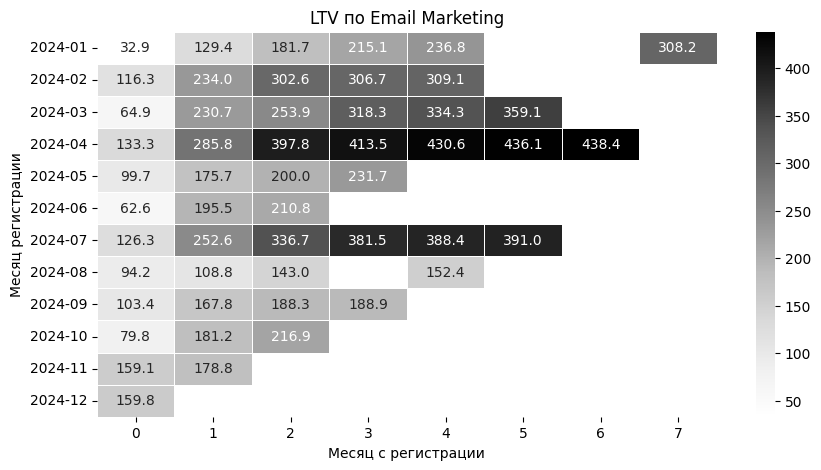

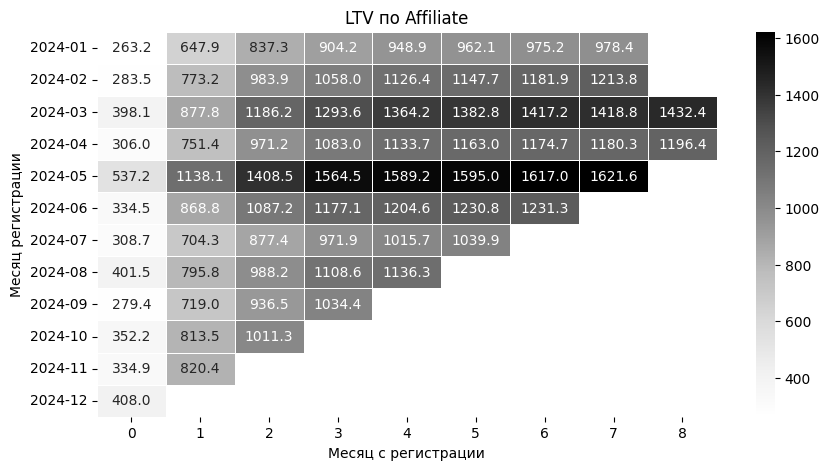

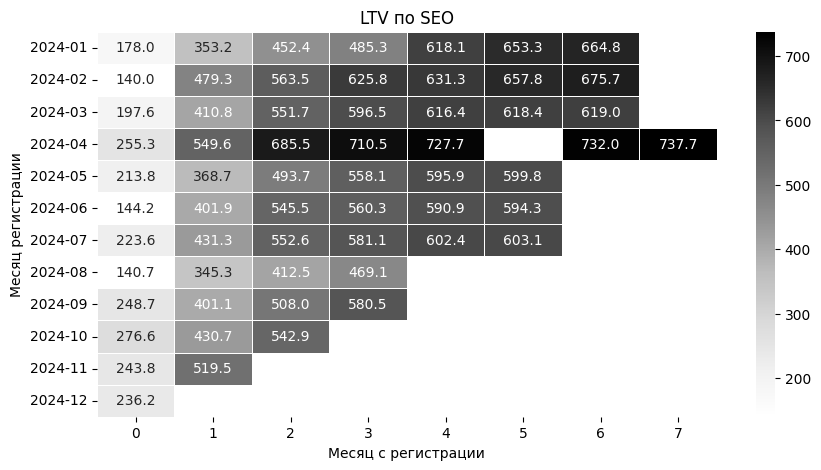

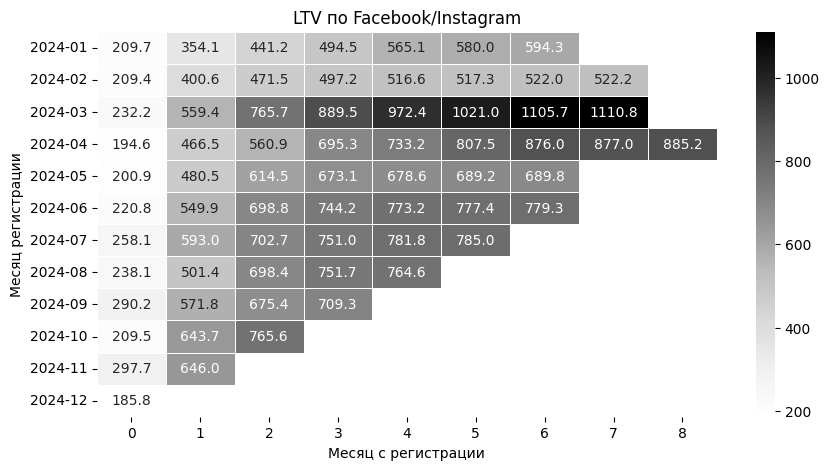

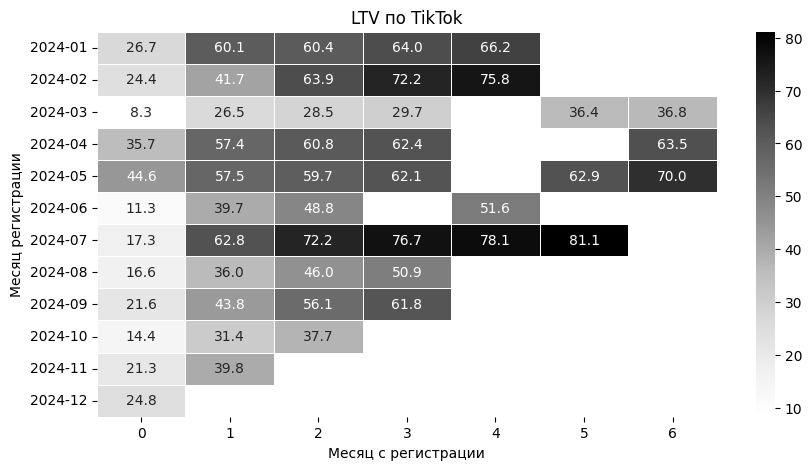

In [35]:
for segment in total_df['acq_channel'].unique():
    heatmap_df = total_df.query('acq_channel == @segment')
    cohort_analysis(heatmap_df)

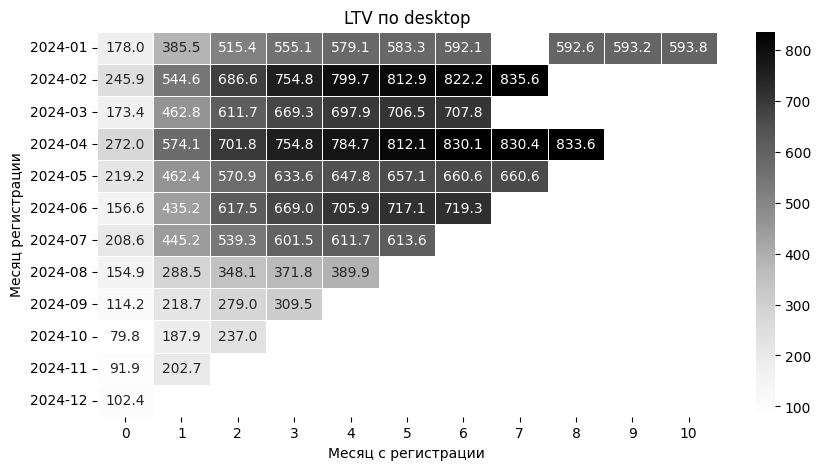

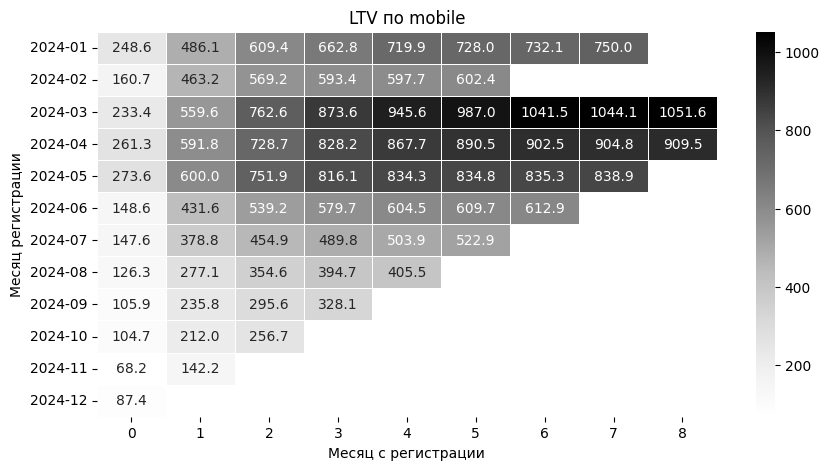

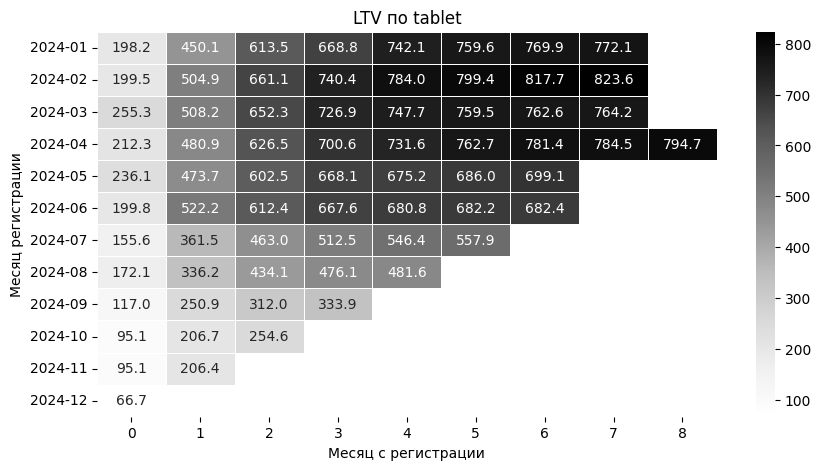

In [36]:
for segment in total_df['device'].unique():
    heatmap_df = total_df.query('device == @segment')
    cohort_analysis(heatmap_df)

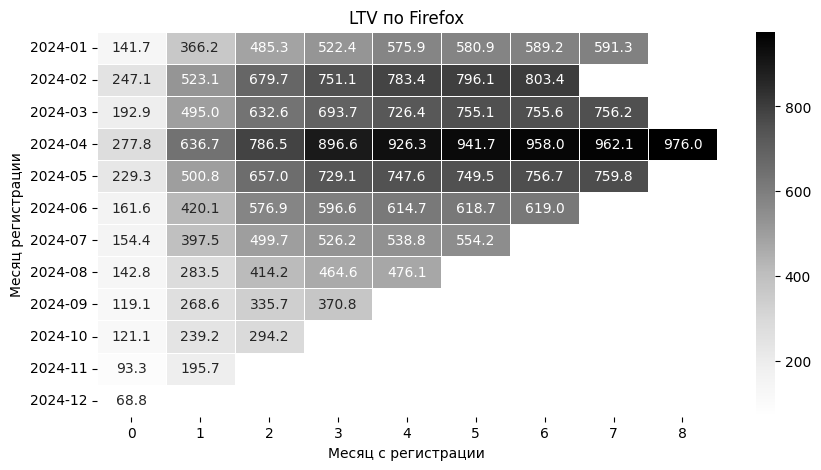

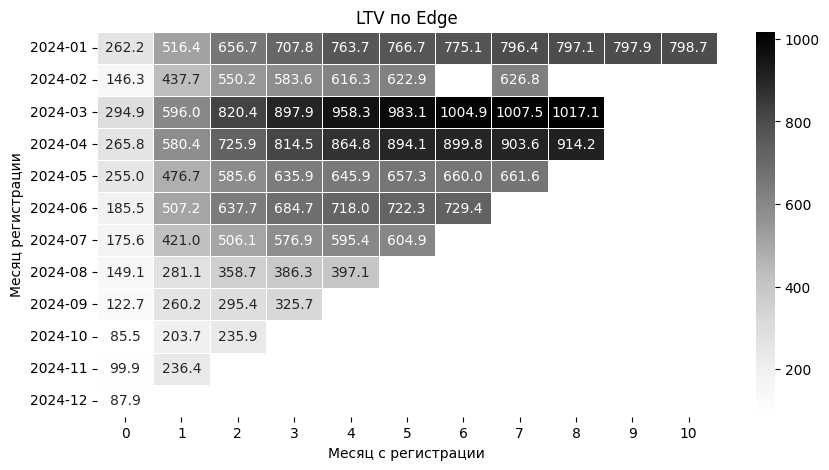

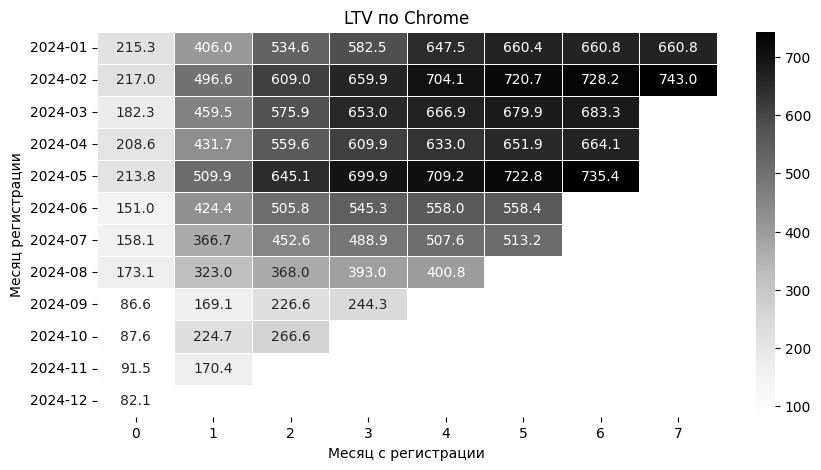

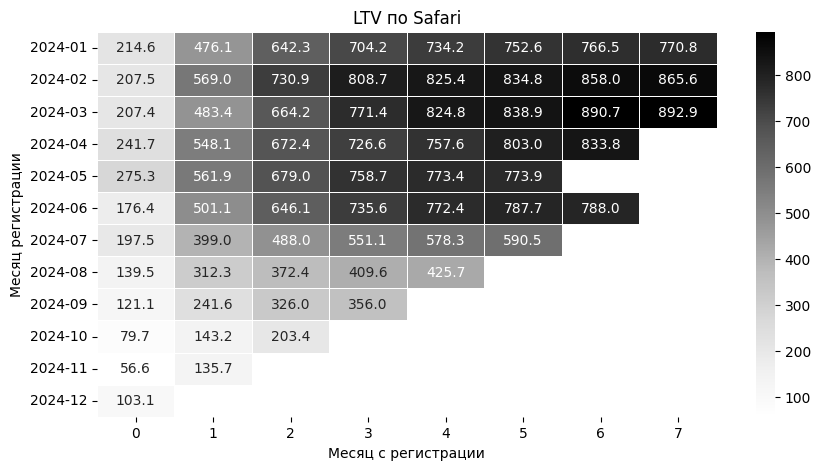

In [37]:
for segment in total_df['browser'].unique():
    heatmap_df = total_df.query('browser == @segment')
    cohort_analysis(heatmap_df)

## Промежуточные выводы

- **Какие сегменты работают лучше остальных**
    - Единственный сегмент, который не упал в показателях ни в абсолютных ни относительных величинах это канал привлечения пользователей по **Facebook/Instagram**
- **Какие сегменты работают хуже остальных**
    - Технические платформы с повышенным падением метрик:
        - Операционные системы: macOS, Android, Windows
        - Устройства: mobile, tablet
        - Браузеры: Safari
        - Регионы: Екатеринбург и прочие регионы
    - Несмотря на различия в степени падения между сегментами, все направления подвержены единому негативному тренду:
        - Привлечение незаинтересованной аудитории
        - Ускоренный отток пользователей на ранних стадиях
        - Снижение общей эффективности удержания

- **На каких этапах воронки теряются пользователи**
    - Ближе к концу года уменьшается доля клиентов, которые доходят до этапа добавления товаров в корзину и ее оплаты
- **Куда стоит инвестировать больше внимания или ресурсов**
    - **Критический период: июль 2024 года — точка начала системной деградации показателей**
    - Фундаментальная проблема начала развиваться после июля 2024 года. Возможно, это была новая политика компании, либо новый UI/UX, либо поменялась ситуация на рынке в связи с внешними нормами\регуляторами\конкурентами, либо же просто был принят неконкуретный способ развития продукта и началось его стремительное затухание на столь конкуретном рынке 

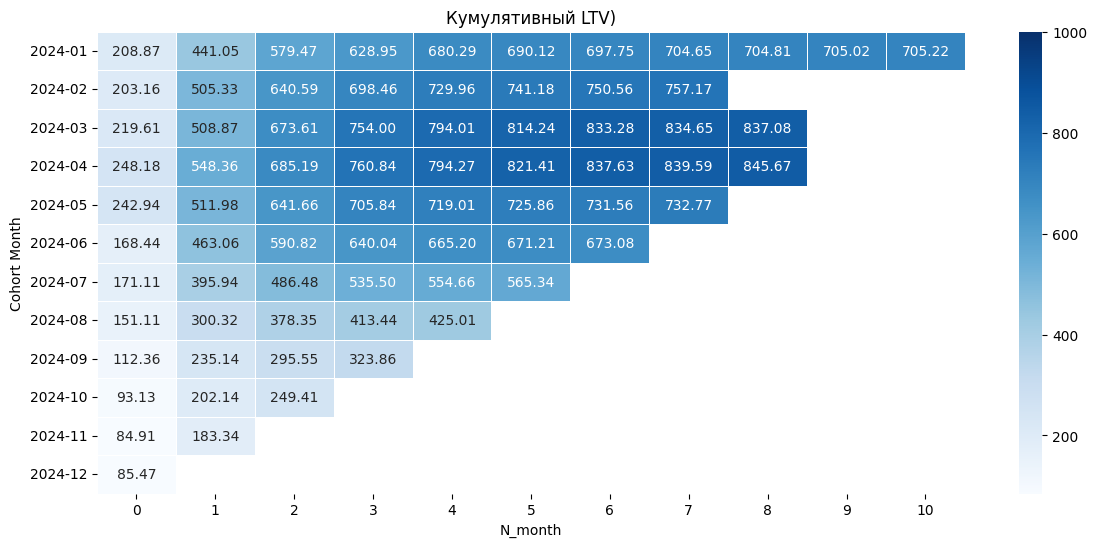

In [38]:
# Ячейка ревьюера: добавляем к заказам пользователей
tmp_orders = pa_diploma_orders[['order_id', 'user_id', 'order_date','order_month','revenue']].merge(pa_diploma_users,
                             on='user_id', how='inner')

# Скорректируем даты
tmp_orders['order_month'] = pd.to_datetime(tmp_orders['order_month']).dt.to_period('M')
tmp_orders['cohort_month'] = pd.to_datetime(tmp_orders['cohort_month']).dt.to_period('M')

# Рассчитаем период
tmp_orders['n_period'] = (tmp_orders['order_month'] - tmp_orders['cohort_month']).apply(lambda x: x.n)

# Группируем и считаем накопленный доход
ltv = tmp_orders.groupby(['cohort_month', 'n_period']).agg(
    total_revenue=('revenue', 'sum')
).reset_index()

ltv = ltv.sort_values(['cohort_month', 'n_period'])
ltv['total_revenue_cum'] = ltv.groupby('cohort_month')['total_revenue'].cumsum()

# Считаем размер когорт по данным таблицы с пользователям
cohort_sizes = pa_diploma_users.groupby('cohort_month')['user_id'].nunique().reset_index()
cohort_sizes.columns = ['cohort_month', 'n_users']
cohort_sizes['cohort_month'] =  pd.to_datetime(cohort_sizes['cohort_month']).dt.to_period('M')

# Добавляем число пользователей в когорте
ltv = ltv.merge(cohort_sizes, on='cohort_month', how='left')

# LTV = кумулятивный доход / размер когорты
ltv['ltv'] = ltv['total_revenue_cum'] / ltv['n_users']

# Делаем таблицу под heatmap
pivot = ltv.pivot(index='cohort_month', columns='n_period', values='ltv')

plt.figure(figsize=(14, 6))
sns.heatmap(
    pivot,
    cmap='Blues',         
    annot=True, 
    fmt='.2f',  
    linewidths=0.5, linecolor='white', 
    vmax=1000
)

plt.title('Кумулятивный LTV)')
plt.xlabel('N_month')
plt.ylabel('Cohort Month')

plt.show()

# Новые вводные 

Команда продукта рассмотрела твои гипотезы и на основании этого решила влиять на конверсию при помощи финансовых стимуляций. Так как ситуация со снижением выручки срочная и безотлагательная, пока ты продолжал изучать данные, они подключили другого аналитика для подготовки дизайн документа, но само проведение эксперимента на тебе. При формировании выводов допиши рекомендации по итогам теста и, если необходимо, опиши проблемы, присутствующие в эксперименте. 

Новые данные: 

```python
pa_diploma_events_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_events_AB.csv') 
pa_diploma_orders_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_orders_AB.csv') 
pa_diploma_sessions_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_sessions_AB.csv') 
pa_diploma_users_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_users_AB.csv')
```

Результаты сплита лежат в таблице: 

```python 
pa_diploma_AB_split_users = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_AB_split_users.csv')
```

* user_id – id клиента 
* group – группа, в которую попал клиент 

Дизайн эксперимента: 

Бонус на первую покупку для пользователей TikTok 

Контекст и цель эксперимента

- **Бизнес-контекст:** Команда продукта запускает эксперимент, направленный на повышение конверсии среди пользователей, привлечённых через канал TikTok. Для стимулирования первой покупки пользователям будет предоставлен бонус на первую покупку.  
- **Цель:** Проверить, влияет ли предоставление бонуса на первую покупку на конверсию и выручку среди пользователей TikTok.  
- **Гипотеза:** Предоставление бонуса на первую покупку новым пользователям, привлеченным через TikTok, приведет к увеличению конверсии в первую покупку

---

Формат эксперимента

- **Тип эксперимента:** Сплит-роллинг (rolling split)  
- **Канал:** Только пользователи, пришедшие с TikTok  
- **Группы:**  
  - **Контрольная (A):** пользователи TikTok без бонуса  
  - **Тестовая (B):** пользователи TikTok с бонусом на первую покупку  
- **Распределение:** Равномерное распределение новых пользователей TikTok между группами по дате регистрации  
- **Период проведения:** 3 недели (фиксировано)

---

Ключевые метрики

Основная метрика

- **Конверсия в первую покупку** — доля пользователей, зарегистрировавшихся с TikTok и совершивших первую покупку  
  - *Цель:* увеличить конверсию с помощью бонуса  
  - *Критерий успеха:* статистически значимый рост конверсии в тестовой группе

Вспомогательные метрики

- **ARPU** (средняя выручка на пользователя TikTok)  
- **ARPPU** (средняя выручка на покупателя TikTok)  
- **AOV** (средний чек TikTok)

Барьерная метрика

- **Общая выручка от пользователей TikTok**

---

Размеры групп и запуск

- **Целевая аудитория:** только пользователи TikTok  
- **Размеры групп:** определяются по фактическому трафику TikTok за период эксперимента  
- **Комментарий:** запуск без предварительного расчёта мощности и MDE из-за срочности задачи


In [39]:
# Загружаем данные
pa_diploma_events_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_events_AB.csv') 
pa_diploma_orders_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_orders_AB.csv') 
pa_diploma_sessions_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_sessions_AB.csv') 
pa_diploma_users_AB = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_users_AB.csv')
pa_diploma_AB_split_users = pd.read_csv('https://code.s3.yandex.net/datasets/pa_diploma_AB_split_users.csv')

In [40]:
dataframes_AB = [
    ('pa_diploma_events_AB', pa_diploma_events_AB),
    ('pa_diploma_orders_AB', pa_diploma_orders_AB),
    ('pa_diploma_sessions_AB', pa_diploma_sessions_AB),
    ('pa_diploma_users_AB', pa_diploma_users_AB),
    ('pa_diploma_AB_split_users', pa_diploma_AB_split_users)]

for name, df in dataframes:
    print(f"Информация о {name}:")
    print(df.info())
    print('\nОсновная статистика:')
    print(df.describe())
    print('\nПропущенные значения:')
    print(df.isnull().sum())
    print('\nКоличество дубликатов:')
    print(df.duplicated().sum())
    print('----------------------------------------------------')
    print('----------------------------------------------------')
    print('----------------------------------------------------')

Информация о pa_diploma_orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31357 entries, 0 to 31356
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        31357 non-null  int64         
 1   user_id         31357 non-null  int64         
 2   order_date      31357 non-null  object        
 3   product_name    31357 non-null  object        
 4   quantity        31357 non-null  int64         
 5   unit_price      31357 non-null  float64       
 6   total_price     31357 non-null  float64       
 7   category_name   31357 non-null  object        
 8   order_week      31357 non-null  object        
 9   order_month     31357 non-null  datetime64[ns]
 10  order_date_day  31357 non-null  datetime64[ns]
 11  revenue         31357 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(3), object(4)
memory usage: 2.9+ MB
None

Основная статистика:
           order_id    

In [41]:
# Создаем один общий датафрейм для всей последующей работы
# Берем только нужную информацию
only_users_AB = pa_diploma_users_AB.copy()

# Считаем доход компании
pa_diploma_orders_AB['revenue'] = pa_diploma_orders_AB['quantity'] * pa_diploma_orders_AB['unit_price']

# Объединяем данные с заказами
total_df_AB = only_users_AB.merge(
    pa_diploma_orders_AB[['user_id', 'order_id', 'order_date', 'revenue']], 
    on='user_id', 
    how='left')

# Преобразуем даты
total_df_AB['order_date'] = pd.to_datetime(total_df_AB['order_date'], format='mixed', errors='coerce').dt.to_period('D').dt.to_timestamp()
total_df_AB['registration_date'] = pd.to_datetime(total_df_AB['registration_date']).dt.to_period('D').dt.to_timestamp()

# Заполняем пропуски
total_df_AB['order_date'] = total_df_AB['order_date'].fillna(total_df_AB['registration_date'])
total_df_AB['revenue'] = total_df_AB['revenue'].fillna(0)

# Оставляем только пользователей из AB-теста
total_df_AB = total_df_AB.query('user_id in @pa_diploma_AB_split_users.user_id')

# Добавляем информацию о группах
total_df_AB = total_df_AB.merge(
    pa_diploma_AB_split_users,
    on='user_id',
    how='left')

# Создаем признак конверсии
total_df_AB['conversion'] = ((total_df_AB['revenue'] > 0) & (total_df_AB['revenue'].notna())).astype(int)

# Сортируем
total_df_AB.sort_values(by=['user_id', 'order_date'], inplace=True)

total_df_AB

user_id registration_date       os  age   device gender  \
0       44965        2025-01-01      iOS   66  desktop      M   
1       44967        2025-01-01      iOS   70   tablet      M   
2       44968        2025-01-01  Android   68   mobile      F   
3       44969        2025-01-01  Windows   24   mobile      F   
4       44970        2025-01-01      iOS   50   tablet      M   
...       ...               ...      ...  ...      ...    ...   
3092    48902        2025-01-26  Android   27   tablet      F   
3093    48903        2025-01-26      iOS   51   tablet      M   
3094    48904        2025-01-26    macOS   60   mobile      F   
3095    48906        2025-01-26    macOS   57   tablet      F   
3096    48907        2025-01-26    macOS   69   tablet      F   

                  region  browser country acq_channel  campaign_id  \
0            Новосибирск   Safari  Россия      TikTok         14.0   
1     Московская область  Firefox  Россия      TikTok         13.0   
2        Нижний Новгород     Edge  Россия      TikTok         10.0   
3              Краснодар   Chrome  Россия      TikTok          8.0   
4        Санкт-Петербург   Chrome  Россия      TikTok          2.0   
...                  ...      ...     ...         ...          ...   
3092      Другие регионы   Safari  Россия      TikTok          8.0   
3093      Другие регионы  Firefox  Россия      TikTok          1.0   
3094      Другие регионы     Edge  Россия      TikTok         17.0   
3095     Санкт-Петербург     Edge  Россия      TikTok         46.0   
3096  Московская область   Safari  Россия      TikTok         17.0   

     user_segment buyer_segment cohort_week cohort_month  order_id order_date  \
0         новичок      one_time  2024-12-30   2025-01-01       NaN 2025-01-01   
1         новичок          rare  2024-12-30   2025-01-01       NaN 2025-01-01   
2          спящий       regular  2024-12-30   2025-01-01       NaN 2025-01-01   
3          спящий        medium  2024-12-30   2025-01-01       NaN 2025-01-01   
4          спящий       regular  2024-12-30   2025-01-01   37063.0 2025-01-04   
...           ...           ...         ...          ...       ...        ...   
3092          VIP       regular  2025-01-20   2025-01-01       NaN 2025-01-26   
3093      новичок          rare  2025-01-20   2025-01-01       NaN 2025-01-26   
3094     активный        medium  2025-01-20   2025-01-01       NaN 2025-01-26   
3095     активный          rare  2025-01-20   2025-01-01       NaN 2025-01-26   
3096       спящий      one_time  2025-01-20   2025-01-01       NaN 2025-01-26   

       revenue      group  conversion  
0         0.00    control           0  
1         0.00    control           0  
2         0.00    control           0  
3         0.00  treatment           0  
4     14715.69    control           1  
...        ...        ...         ...  
3092      0.00  treatment           0  
3093      0.00    control           0  
3094      0.00    control           0  
3095      0.00    control           0  
3096      0.00  treatment           0  

[3097 rows x 20 columns]

In [42]:
# Группировка
group_a = total_df_AB.query('group == "control"')
group_b = total_df_AB.query('group == "treatment"')

# Поиск пересечений
intersection = set(group_a['user_id']) & set(group_b['user_id'])
print(f'Количество юзеров попавших в обе группы A/B теста = {len(intersection)}')

Количество юзеров попавших в обе группы A/B теста = 0


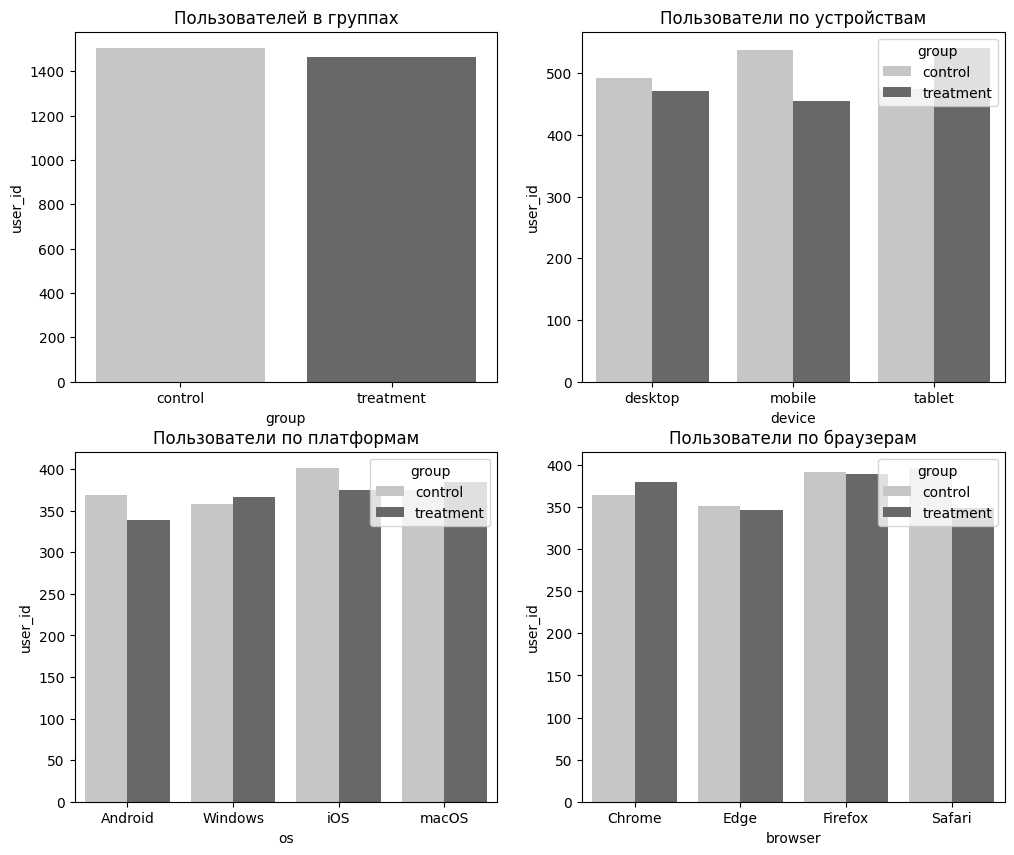

Разница количества человек в выборке = 2.59% или 38 человек


In [43]:
# Сравним количество пользователей в каждой группе
ab_total_users = total_df_AB.groupby(['group'])['user_id'].nunique().reset_index()
ab_device = total_df_AB.groupby(['group', 'device'])['user_id'].nunique().reset_index()
ab_os = total_df_AB.groupby(['group', 'os'])['user_id'].nunique().reset_index()
ab_browser = total_df_AB.groupby(['group', 'browser'])['user_id'].nunique().reset_index()

# Визуализация
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.barplot(data=ab_total_users, x='group', y='user_id', hue='group', palette='Greys')
plt.title('Пользователей в группах')
plt.subplot(2, 2, 2)
sns.barplot(data=ab_device, x='device', y='user_id', hue='group', palette='Greys')
plt.title('Пользователи по устройствам')
plt.subplot(2, 2, 3)
sns.barplot(data=ab_os, x='os', y='user_id', hue='group', palette='Greys')
plt.title('Пользователи по платформам')
plt.subplot(2, 2, 4)
sns.barplot(data=ab_browser, x='browser', y='user_id', hue='group', palette='Greys')
plt.title('Пользователи по браузерам')
plt.show()

# Подсчет разницы в выборках (%)
ab_difference = (
    (ab_total_users.query('group=="control"')['user_id'].iloc[0]
    / ab_total_users.query('group=="treatment"')['user_id'].iloc[0] - 1) * 100).round(2)

# Подсчет разницы в выборках (чел.)
ab_difference_abs = (
    ab_total_users.query('group=="control"')['user_id'].iloc[0] 
    - ab_total_users.query('group=="treatment"')['user_id'].iloc[0])

print(f'Разница количества человек в выборке = {ab_difference}% или {ab_difference_abs} человек')

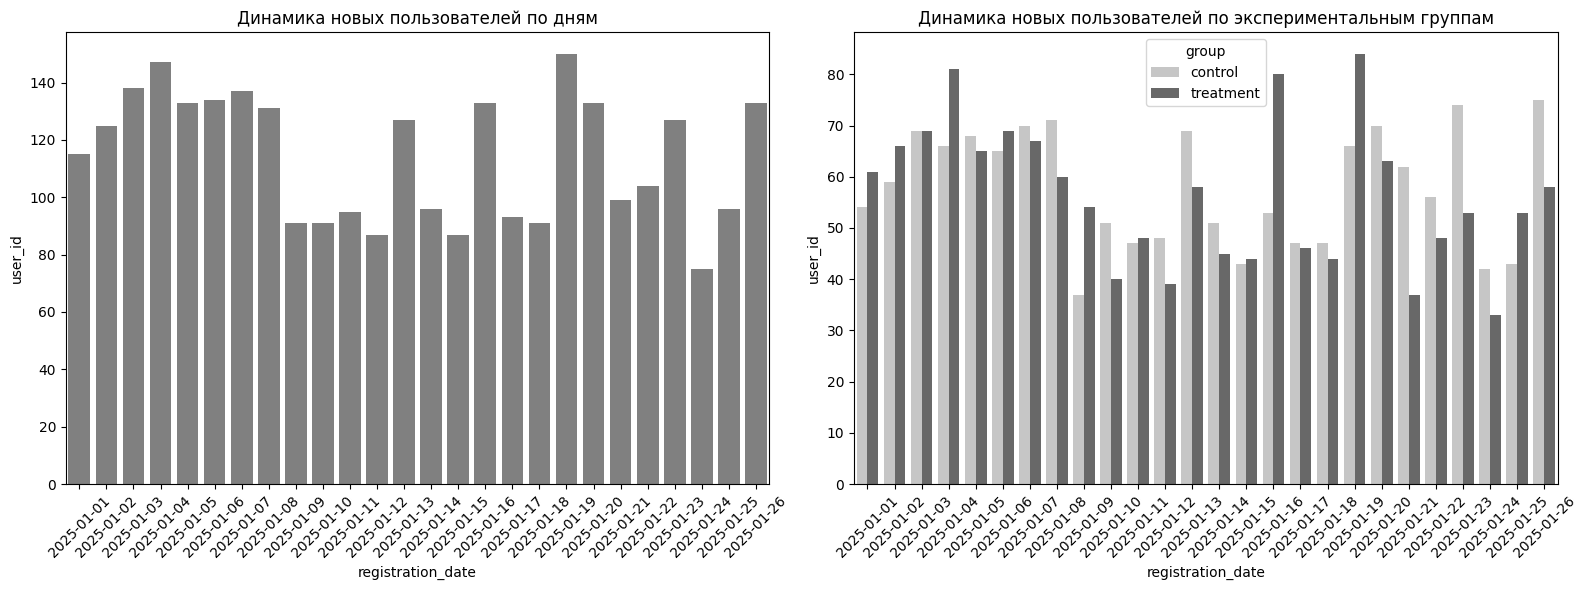

In [44]:
ab_new_users_everyday = total_df_AB.groupby('registration_date')['user_id'].nunique().reset_index()
ab_new_users_everyday_group = total_df_AB.groupby(['registration_date', 'group'])['user_id'].nunique().reset_index()

# Визуализация
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=ab_new_users_everyday, x='registration_date', y='user_id', color='grey')
plt.title('Динамика новых пользователей по дням')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.barplot(data=ab_new_users_everyday_group, x='registration_date', y='user_id', hue='group', palette='Greys')
plt.title('Динамика новых пользователей по экспериментальным группам')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Группы не имеют пересечений, сплитование произошло корректно и без нареканий
- Выборки немного неравны по общему количеству пользователей с небольшим перевесом в сторону контрольной группы, в том числе по графику привлечения новых пользователей, но пропорции распределения по группам крайне схожи, что говорит о качественном сплитовании пользователей с небольшой разницей в размере выборок
- Незначительная разница в размерах выборок не критична и не повлияет на статистическую значимость результатов анализа. Эксперимент готов к анализу основных метрик без дополнительных корректировок.

##### Ключевая метрика

/tmp/ipykernel_164385/356746672.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cr_diff_abs = pivot_cr[1][1] - pivot_cr[1][0]
/tmp/ipykernel_164385/356746672.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cr_treatment = pivot_cr[1][1] / pivot_cr[0][1]
/tmp/ipykernel_164385/356746672.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cr_control = pivot_cr[1][0] / pivot_cr[0][0]


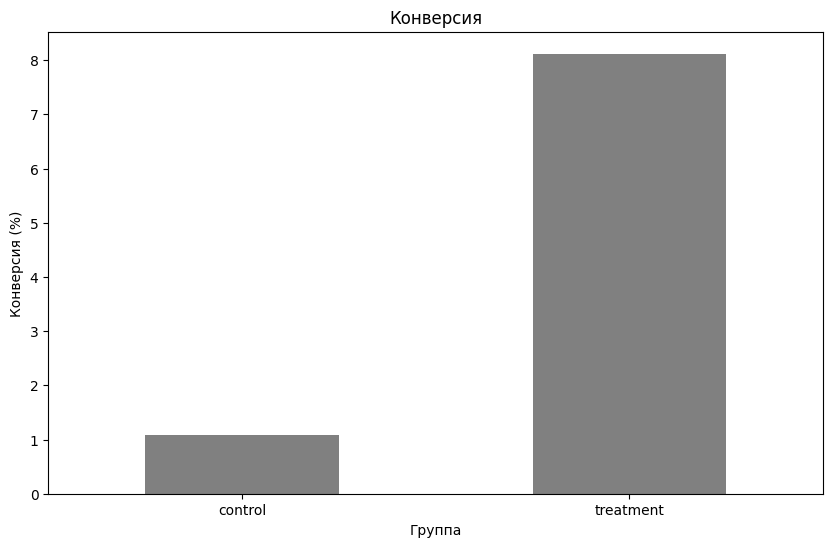

Контрольная неконвертированная группа = 1487, контрольная конвертированная группа = 16
----------------------------
Тестовая неконвертированная группа = 1355, тестовая конвертированная группа = 110
----------------------------
Абсолютная разница в конверсии = 94 пользователя в пользу тестовой группы
----------------------------
Относительная разница в конверсии = 654.47% в пользу тестовой группы


/tmp/ipykernel_164385/356746672.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Контрольная неконвертированная группа = {pivot_cr[0][0]}, контрольная конвертированная группа = {pivot_cr[1][0]}')
/tmp/ipykernel_164385/356746672.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Тестовая неконвертированная группа = {pivot_cr[0][1]}, тестовая конвертированная группа = {pivot_cr[1][1]}')


In [45]:
cr_df = total_df_AB.groupby(['group', 'conversion'])['user_id'].nunique().reset_index()
cr_df = cr_df.rename(columns={'user_id': 'total_users'})

pivot_cr = cr_df.pivot(
    index='group',
    columns='conversion',
    values='total_users')

pivot_cr['CR_%'] = pivot_cr[1] / pivot_cr[0] * 100

cr_diff_abs = pivot_cr[1][1] - pivot_cr[1][0] 

cr_treatment = pivot_cr[1][1] / pivot_cr[0][1]  
cr_control = pivot_cr[1][0] / pivot_cr[0][0]    
cr_diff_rel = (cr_treatment - cr_control) / cr_control * 100  


plt.figure(figsize=(10, 6))
pivot_cr['CR_%'].plot(kind='bar', color='grey')
plt.title('Конверсия')
plt.xlabel('Группа')
plt.ylabel('Конверсия (%)')
plt.xticks(rotation=0)
plt.show()

print(f'Контрольная неконвертированная группа = {pivot_cr[0][0]}, контрольная конвертированная группа = {pivot_cr[1][0]}')   
print('----------------------------')
print(f'Тестовая неконвертированная группа = {pivot_cr[0][1]}, тестовая конвертированная группа = {pivot_cr[1][1]}')
print('----------------------------')
print(f'Абсолютная разница в конверсии = {cr_diff_abs} пользователя в пользу тестовой группы')
print('----------------------------')
print(f'Относительная разница в конверсии = {cr_diff_rel:.2f}% в пользу тестовой группы')

- Нулевая гипотеза: Предоставление бонуса на первую покупку новым пользователям, привлеченным через TikTok, **не** **приведет** к увеличению конверсии в первую покупку
- Альтернативная гипотеза: Предоставление бонуса на первую покупку новым пользователям, привлеченным через TikTok, **приведет** к увеличению конверсии в первую покупку

In [46]:
# Проводим z-test пропорций
n_a_bar, n_b_bar = pivot_cr.iloc[0][0], pivot_cr.iloc[1][0]
m_a_bar, m_b_bar = pivot_cr.iloc[0][1], pivot_cr.iloc[1][1]

alpha = 0.05

proportion_ztest_bar, p_value_ztest_bar = proportions_ztest(
    [m_a_bar, m_b_bar],
    [n_a_bar, n_b_bar],
    alternative='two-sided')

# Проведем z-test
if p_value_ztest_bar < 0.05:
    print(f'Альтернативная гипотеза верна, разница пропорций статистически значима, так как p_value = {round(p_value_ztest_bar, 20)}')
else:
    print(f'Нулевая гипотеза верна, разница пропорций не статистически значима, так как p_value = {round(p_value_ztest_bar, 20)}')

Альтернативная гипотеза верна, разница пропорций статистически значима, так как p_value = 8e-20


##### Барьерная метрика

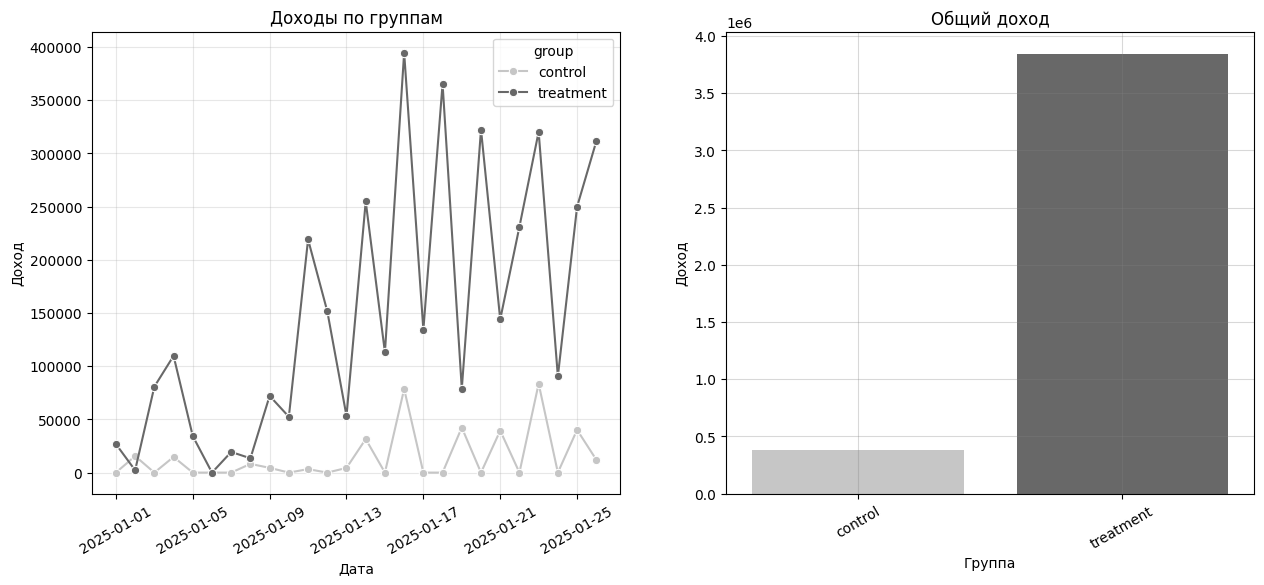

Общий доход контрольной группы = 378372.89999999997
----------------------------
Общий доход тестовой группы = 3845597.03
----------------------------
Абсолютная разница в конверсии = 3467224.13 в пользу тестовой группы
----------------------------
Относительная разница в конверсии = 916.35% в пользу тестовой группы


In [47]:
# Считаем доход от заказов за каждый день с месячной скользящей средней
total_revenue_AB = total_df_AB.groupby(['order_date', 'group'])['revenue'].sum().reset_index()
sum_revenue_AB = total_df_AB.groupby('group')['revenue'].sum().reset_index()

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=total_revenue_AB, x='order_date', y='revenue', hue='group', palette='Greys', marker='o')
plt.title('Доходы по группам')
plt.xlabel('Дата')
plt.ylabel('Доход')
plt.xticks(rotation=30)
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
sns.barplot(data=sum_revenue_AB, x='group', y='revenue', hue='group', palette='Greys')
plt.title('Общий доход')
plt.xlabel('Группа')
plt.ylabel('Доход')
plt.xticks(rotation=30)
plt.grid(alpha=0.3, color='grey')

plt.show()


revenue_diff_abs = sum_revenue_AB['revenue'][1] - sum_revenue_AB['revenue'][0]
   
revenue_diff_rel = (sum_revenue_AB['revenue'][1] - sum_revenue_AB['revenue'][0]) / sum_revenue_AB['revenue'][0] * 100  


print(f'Общий доход контрольной группы = {sum_revenue_AB["revenue"][0]}')   
print('----------------------------')
print(f'Общий доход тестовой группы = {sum_revenue_AB["revenue"][1]}')
print('----------------------------')
print(f'Абсолютная разница в конверсии = {revenue_diff_abs} в пользу тестовой группы')
print('----------------------------')
print(f'Относительная разница в конверсии = {revenue_diff_rel:.2f}% в пользу тестовой группы')

- Нулевая гипотеза - средний доход от заказов между группами не отличается
- Альтернативная гипотеза - средний доход от заказов между группами отличается

In [48]:
# Данные для t-test
revenue_ttest_control = total_revenue_AB.query('group == "control"')['revenue'].dropna()
revenue_ttest_test = total_revenue_AB.query('group == "treatment"')['revenue'].dropna()

# Проведем t-test
revenue_stat, revenue_p_value = ttest_ind(revenue_ttest_control, revenue_ttest_test)
if revenue_p_value < 0.05:
    print(f'Альтернативная гипотеза верна, так как разница статистически значима, так как p_value = {revenue_p_value}')
else:
    print(f'Нулевая гипотеза верна, так как разница не статистически значима, так как p_value = {revenue_p_value}')

Альтернативная гипотеза верна, так как разница статистически значима, так как p_value = 1.4966278957232982e-06


##### Вспомогательные метрики

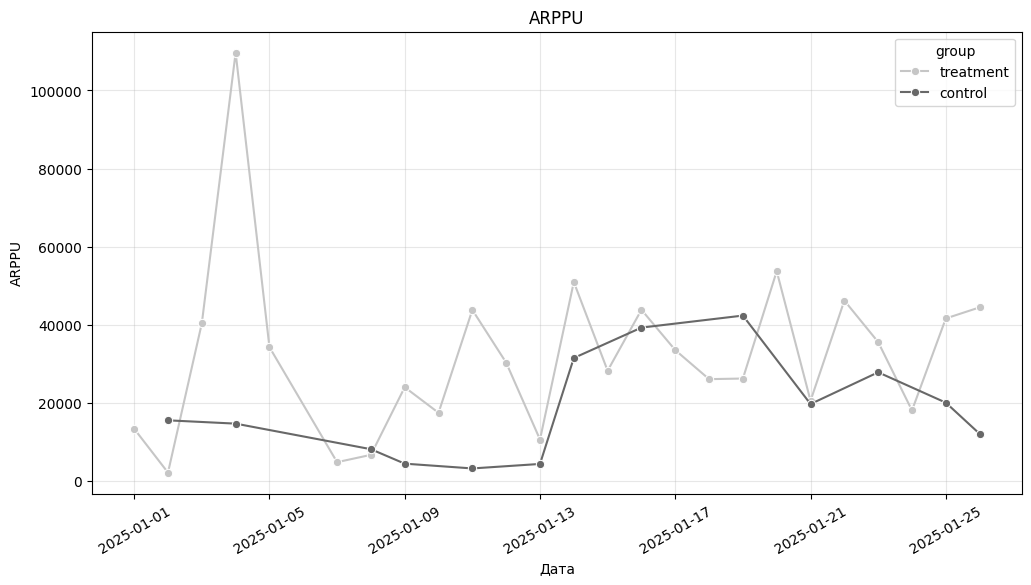

Средняя ARPPU контрольной группы = 18733.58
----------------------------
Средняя ARPPU тестовой группы = 32286.05
----------------------------
Абсолютная разница в конверсии = 2165.48 в пользу тестовой группы
----------------------------
Относительная разница в конверсии = 16.16% в пользу тестовой группы


In [49]:
# ARPPU
total_pay_users_per_day_AB = total_df_AB.query('conversion == 1').groupby(['order_date', 'group'])['user_id'].nunique().reset_index()
total_pay_users_per_day_AB = total_pay_users_per_day_AB.rename(columns={'user_id': 'pay_users'})

total_arppu_AB = total_revenue_AB.merge(total_pay_users_per_day_AB, on=['order_date', 'group'])
total_arppu_AB['ARPPU'] = total_arppu_AB['revenue'] / total_arppu_AB['pay_users']

plt.figure(figsize=(12, 6))
sns.lineplot(data=total_arppu_AB, x='order_date', y='ARPPU', hue='group', palette='Greys', marker='o')
plt.title('ARPPU')
plt.xlabel('Дата')
plt.ylabel('ARPPU')
plt.xticks(rotation=30)
plt.grid(alpha=0.3)
plt.show()

diff_arppu_AB = total_arppu_AB.groupby('group')['ARPPU'].mean().reset_index()

ARPPU_diff_abs = total_arppu_AB['ARPPU'][1] - total_arppu_AB['ARPPU'][0]
   
ARPPU_diff_rel = (total_arppu_AB['ARPPU'][1] - total_arppu_AB['ARPPU'][0]) / total_arppu_AB['ARPPU'][0] * 100  


print(f'Средняя ARPPU контрольной группы = {round(diff_arppu_AB["ARPPU"][0], 2)}')   
print('----------------------------')
print(f'Средняя ARPPU тестовой группы = {round(diff_arppu_AB["ARPPU"][1], 2)}')
print('----------------------------')
print(f'Абсолютная разница в конверсии = {round(ARPPU_diff_abs, 2)} в пользу тестовой группы')
print('----------------------------')
print(f'Относительная разница в конверсии = {ARPPU_diff_rel:.2f}% в пользу тестовой группы')

- Нулевая гипотеза - средняя доходность от платящих пользователей между группами не отличается
- Альтернативная гипотеза - средняя доходность от платящих пользователей между группами отличается

In [50]:
# Данные для t-test
arppu_ttest_control = total_arppu_AB.query('group == "control"')['ARPPU'].dropna()
arppu_ttest_test = total_arppu_AB.query('group == "treatment"')['ARPPU'].dropna()

# Проведем t-test
arppu_stat, arppu_p_value = ttest_ind(arppu_ttest_control, arppu_ttest_test)
if arppu_p_value < 0.05:
    print(f'Альтернативная гипотеза верна, так как разница статистически значима, так как p_value = {arppu_p_value}')
else:
    print(f'Нулевая гипотеза верна, так как разница не статистически значима, так как p_value = {arppu_p_value}')

Альтернативная гипотеза верна, так как разница статистически значима, так как p_value = 0.048037949189153856


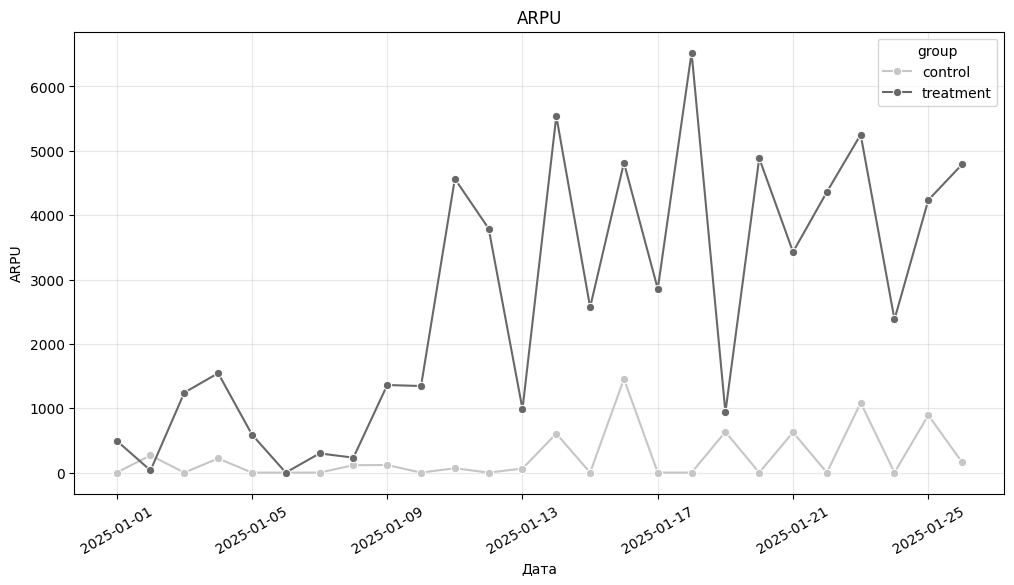

Средняя ARPU контрольной группы = 0.0
----------------------------
Средняя ARPU тестовой группы = 496.17 
----------------------------
Абсолютная разница в конверсии = 496.17 в пользу тестовой группы
----------------------------
Относительная разница в конверсии = inf% в пользу тестовой группы


/tmp/ipykernel_164385/1577845879.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  ARPU_diff_rel = (total_arpu_AB['ARPU'][1] - total_arpu_AB['ARPU'][0]) / total_arpu_AB['ARPU'][0] * 100


In [51]:
# ARPPU
total_users_per_day_AB = total_df_AB.groupby(['order_date', 'group'])['user_id'].nunique().reset_index()
total_users_per_day_AB = total_users_per_day_AB.rename(columns={'user_id': 'total_users'})

total_arpu_AB = total_revenue_AB.merge(total_users_per_day_AB, on=['order_date', 'group'])
total_arpu_AB['ARPU'] = total_arpu_AB['revenue'] / total_arpu_AB['total_users']

plt.figure(figsize=(12, 6))
sns.lineplot(data=total_arpu_AB, x='order_date', y='ARPU', hue='group', palette='Greys', marker='o')
plt.title('ARPU')
plt.xlabel('Дата')
plt.ylabel('ARPU')
plt.xticks(rotation=30)
plt.grid(alpha=0.3)
plt.show()


diff_arpu_AB = total_arpu_AB.groupby('group')['ARPU'].mean().reset_index()

ARPU_diff_abs = total_arpu_AB['ARPU'][1] - total_arpu_AB['ARPU'][0]
   
ARPU_diff_rel = (total_arpu_AB['ARPU'][1] - total_arpu_AB['ARPU'][0]) / total_arpu_AB['ARPU'][0] * 100  


print(f'Средняя ARPU контрольной группы = {round(total_arpu_AB["ARPU"][0], 2)}')   
print('----------------------------')
print(f'Средняя ARPU тестовой группы = {round(total_arpu_AB["ARPU"][1], 2)} ')
print('----------------------------')
print(f'Абсолютная разница в конверсии = {round(ARPU_diff_abs, 2)} в пользу тестовой группы')
print('----------------------------')
print(f'Относительная разница в конверсии = {ARPU_diff_rel:.2f}% в пользу тестовой группы')

- Нулевая гипотеза - средняя доходность от пользователя между группами не отличается
- Альтернативная гипотеза - средняя доходность от пользователя между группами отличается

In [52]:
# Данные для t-test
arpu_ttest_control = total_arpu_AB.query('group == "control"')['ARPU'].dropna()
arpu_ttest_test = total_arpu_AB.query('group == "treatment"')['ARPU'].dropna()

# Проведем t-test
arpu_stat, arpu_p_value = ttest_ind(arpu_ttest_control, arpu_ttest_test)
if arpu_p_value < 0.05:
    print(f'Альтернативная гипотеза верна, так как разница статистически значима, так как p_value = {arpu_p_value}')
else:
    print(f'Нулевая гипотеза верна, так как разница не статистически значима, так как p_value = {arpu_p_value}')

Альтернативная гипотеза верна, так как разница статистически значима, так как p_value = 2.3400891510114465e-07


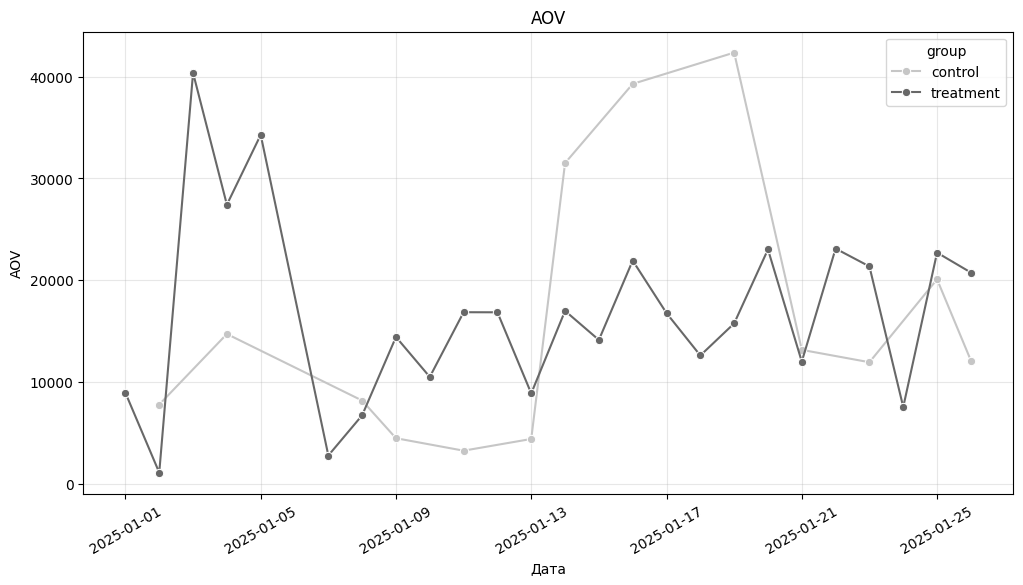

Средняя AOV контрольной группы = 16404.51
----------------------------
Средняя AOV тестовой группы = 16711.21
----------------------------
Абсолютная разница в конверсии = 306.69 не в пользу тестовой группы
----------------------------
Относительная разница в конверсии = 1.87% не в пользу тестовой группы


In [53]:
aov_AB = total_df_AB.groupby(['order_date', 'group'])['order_id'].nunique().reset_index()
aov_AB = aov_AB.rename(columns={'order_id': 'total_orders'})
aov_AB = aov_AB.merge(total_revenue_AB, on=['order_date', 'group'], how='left')
aov_AB['AOV'] = aov_AB['revenue'] / aov_AB['total_orders']

plt.figure(figsize=(12, 6))
sns.lineplot(data=aov_AB, x='order_date', y='AOV', hue='group', palette='Greys', marker='o')
plt.title('AOV')
plt.xlabel('Дата')
plt.ylabel('AOV')
plt.xticks(rotation=30)
plt.grid(alpha=0.3)
plt.show()


diff_AOV_AB = aov_AB.groupby('group')['AOV'].mean().reset_index()

AOV_diff_abs = diff_AOV_AB['AOV'][1] - diff_AOV_AB['AOV'][0]
   
AOV_diff_rel = (diff_AOV_AB['AOV'][1] - diff_AOV_AB['AOV'][0]) / diff_AOV_AB['AOV'][0] * 100  


print(f'Средняя AOV контрольной группы = {round(diff_AOV_AB["AOV"][0], 2)}')   
print('----------------------------')
print(f'Средняя AOV тестовой группы = {round(diff_AOV_AB["AOV"][1], 2)}')
print('----------------------------')
print(f'Абсолютная разница в конверсии = {round(AOV_diff_abs, 2)} не в пользу тестовой группы')
print('----------------------------')
print(f'Относительная разница в конверсии = {AOV_diff_rel:.2f}% не в пользу тестовой группы')

- Нулевая гипотеза - средняя сумма чека пользователя между группами не отличается
- Альтернативная гипотеза - средняя сумма чека пользователя между группами отличается

In [54]:
# Данные для t-test
aov_ttest_control = aov_AB.query('group == "control"')['AOV'].dropna()
aov_ttest_test = aov_AB.query('group == "treatment"')['AOV'].dropna()

# Проведем t-test
aov_stat, aov_p_value = ttest_ind(aov_ttest_control, aov_ttest_test)
if aov_p_value < 0.05:
    print(f'Альтернативная гипотеза верна, так как разница статистически значима, так как p_value = {round(aov_p_value, 3)}')
else:
    print(f'Нулевая гипотеза верна, так как разница не статистически значима, так как p_value = {round(aov_p_value, 3)}')

Нулевая гипотеза верна, так как разница не статистически значима, так как p_value = 0.933


## Выводы

- **AB-тест продемонстрировал исключительную эффективность с драматическим улучшением ключевых показателей**
    - Конверсия в первый заказ: рост в ~7 раз по сравнению с контрольной группой
    - Барьерные метрики: остались на стабильном уровне без негативного влияния
    - Вспомогательные метрики: показали рост или сохранили текущие значения
    - Анализ ARPU vs AOV выявляет важную закономерность:
        - Частота заказов: значительное увеличение среди тестовой группы
        - Средний чек: практически без изменений
        - Вывод: улучшения достигнуты за счет повышения активности пользователей, а не инфляции корзины
    - Критически важно отслеживать долгосрочное удержание пользователей тестовой группы в течение последующих месяцев для подтверждения устойчивости полученных результатов

- Общая проблема
    - AB-тест, несмотря на положительные результаты, не решает основную проблему — системную деградацию показателей приложения, начавшуюся после июля 2024 года
    - Локальные улучшения в отдельных сегментах не компенсируют общего тренда на снижение эффективности продукта в целом

- Рекомендации:
    - Провести комплексный аудит продукта за последний год
    - Пересмотреть общую продуктовую стратегию (если проблема в продуктовом аспекте)
    - Устранить первопричины падения с июля 2024